In [1]:
# %%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

Toggle code

2023-11-29 19:53:01,523 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 
var_type (463, 14)


In [2]:
dataset_name = "W25_only"
BES_Panel = pd.read_stata(BES_data_folder+dataset_name+os.sep+"BES2019_W25_v25.0.dta")

In [3]:
#### get factors - PCA/FA

In [4]:
BES_num = pd.get_dummies(BES_Panel)
BES_num = BES_num[BES_Panel["country"]=="England"]
drop_cols = ['id','wt']
# BES_num.sum().sort_values()[BES_num.sum().sort_values()<200].hist(bins=200)
drop_cols.extend(list(BES_num.sum()[BES_num.sum()<=20].index))
BES_num = BES_num.select_dtypes('number').drop(drop_cols,axis=1) # drop start/finish datetime columns
BES_num = BES_num.fillna(BES_num.mean())

Wall time: 15.7 s


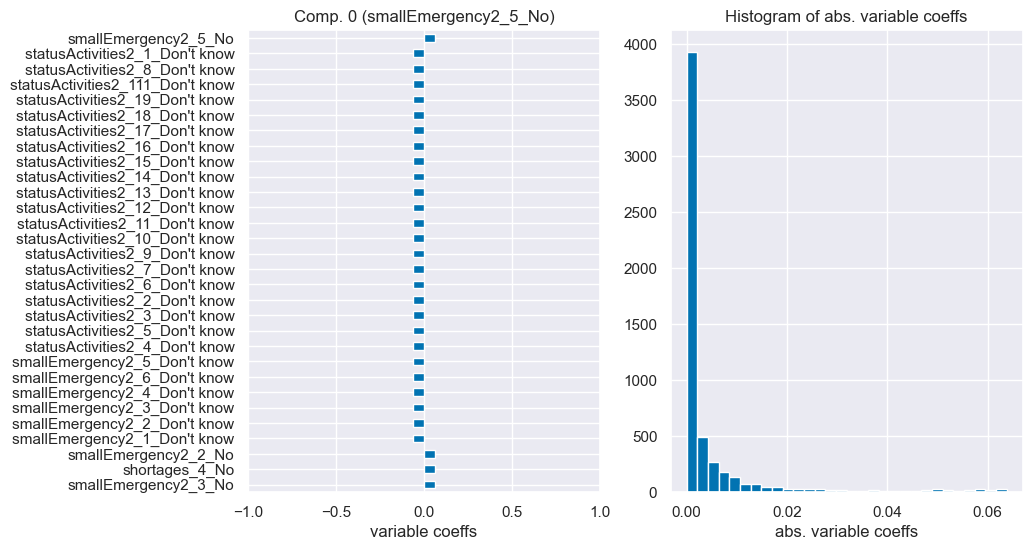

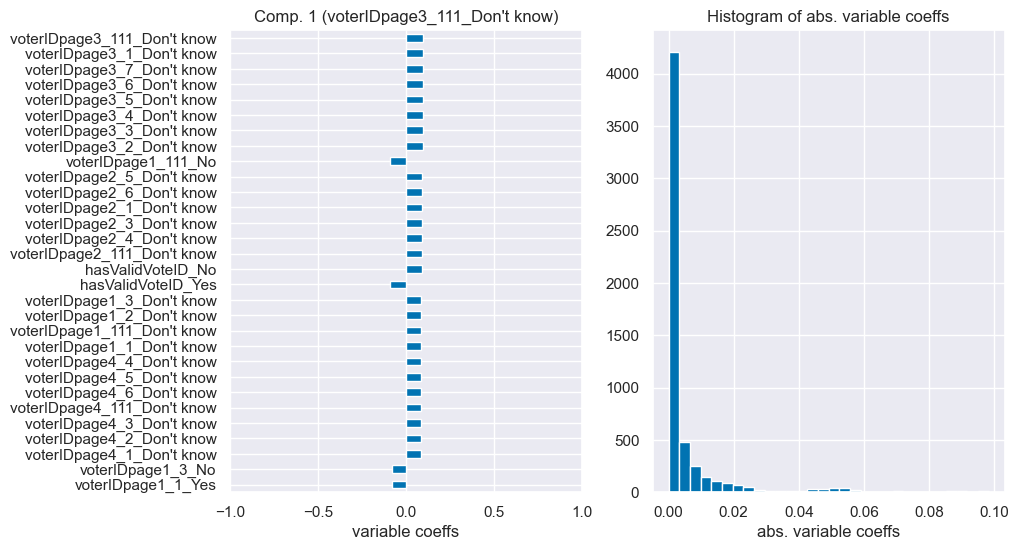

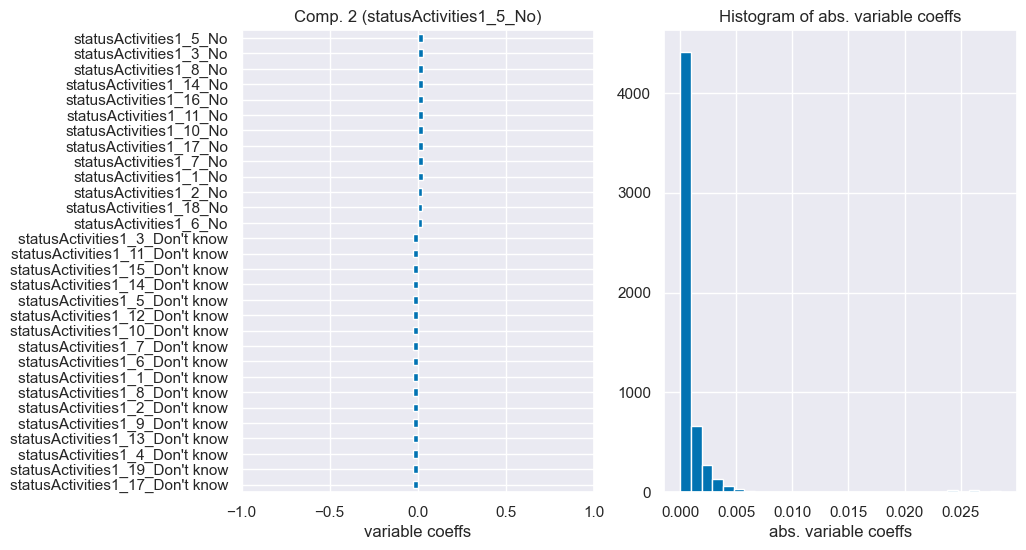

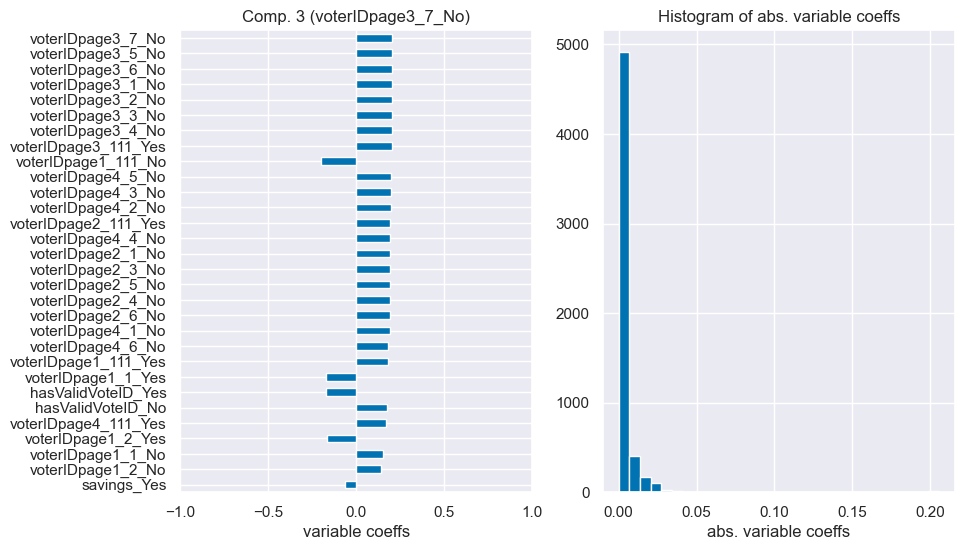

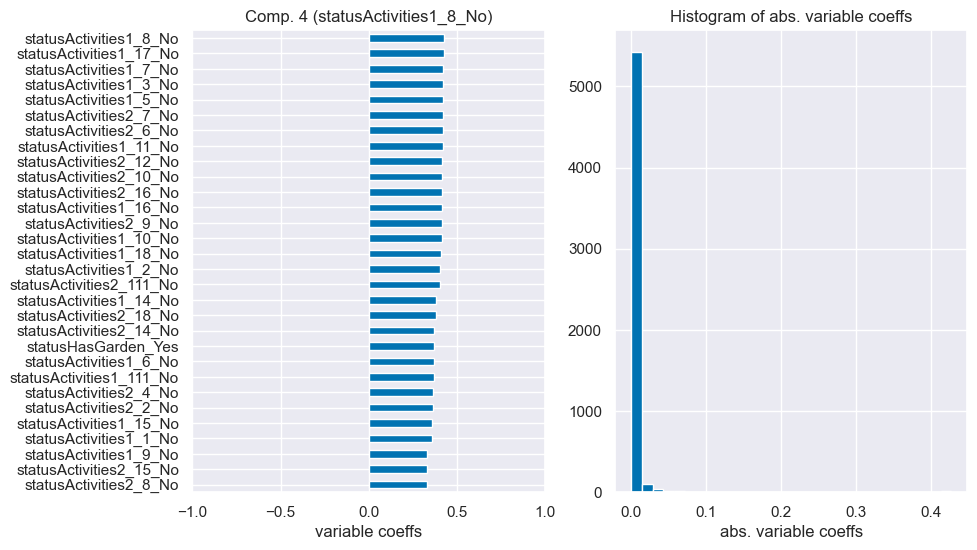

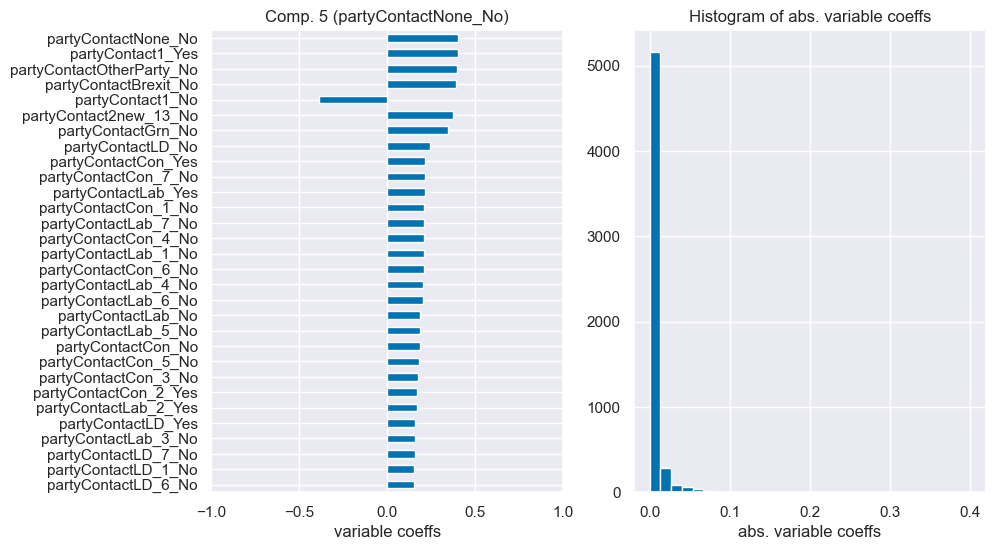

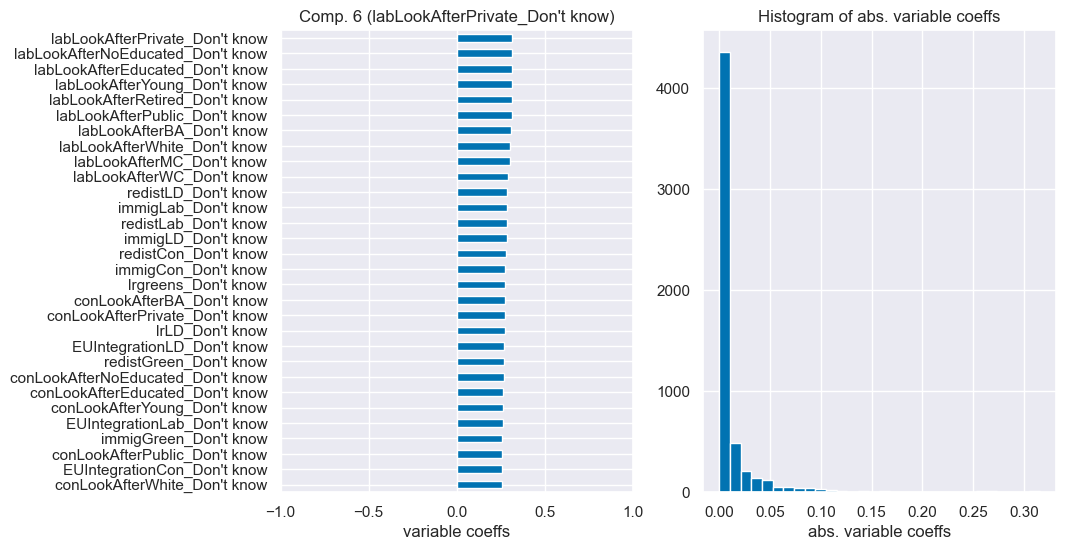

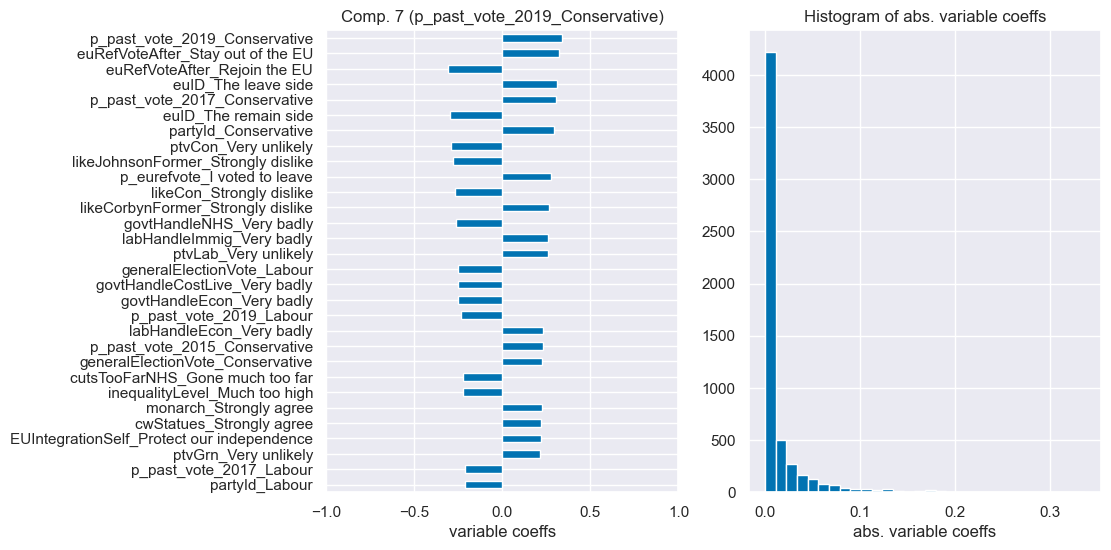

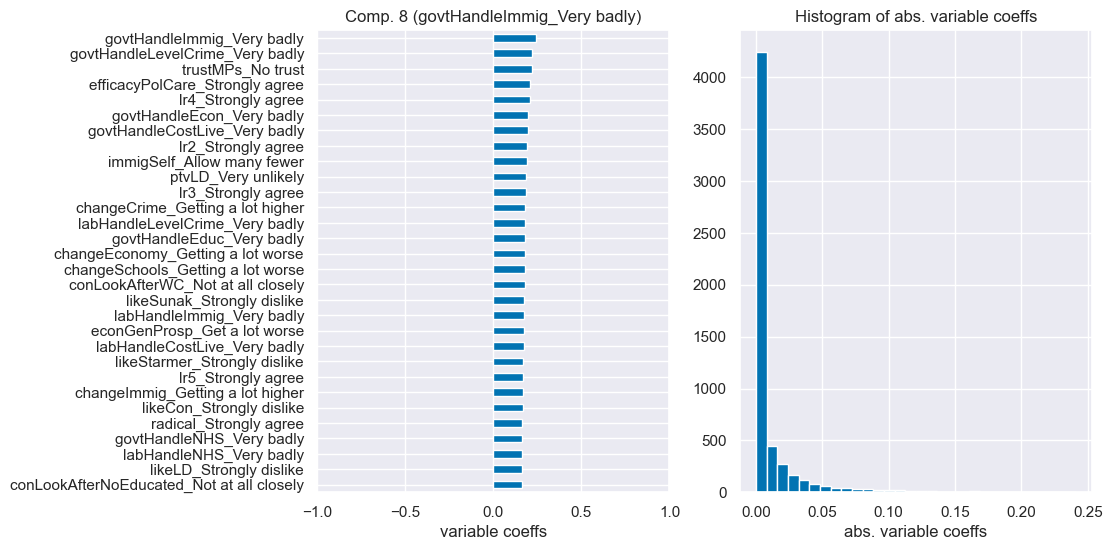

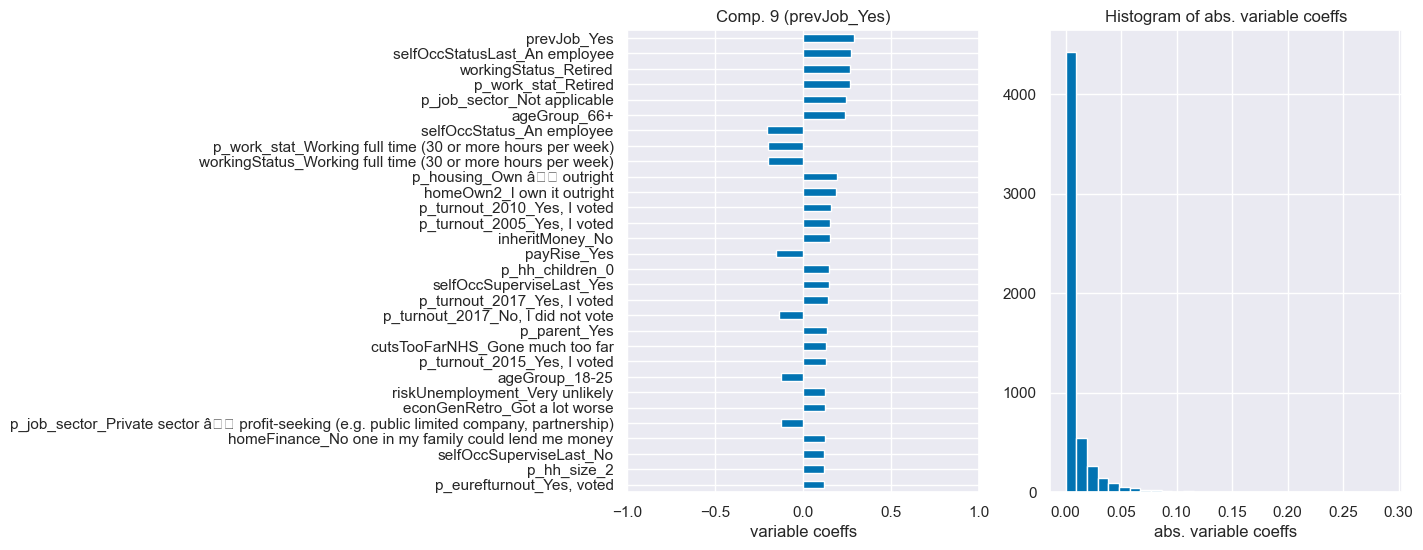

In [5]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

Wall time: 48.9 s


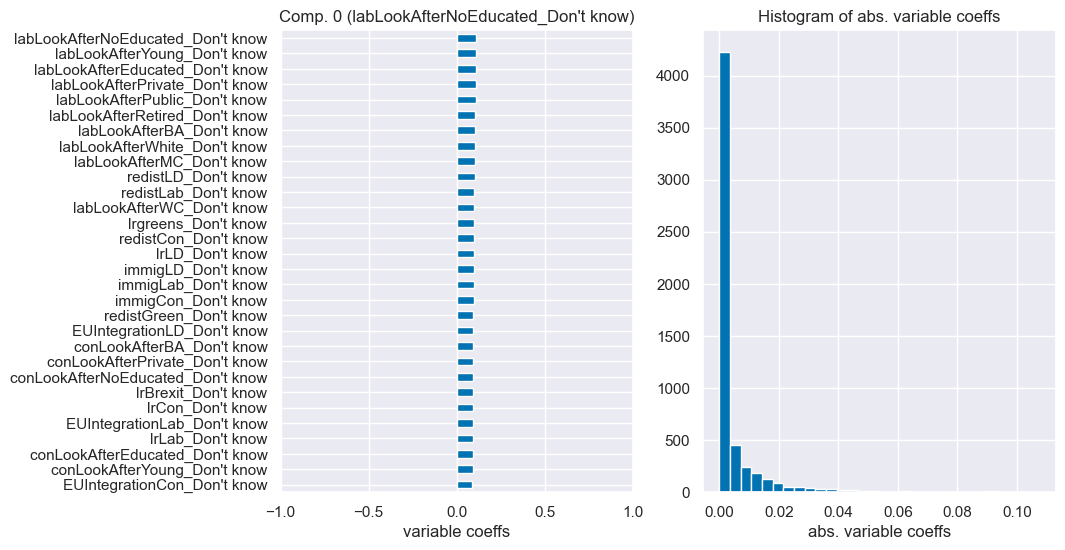

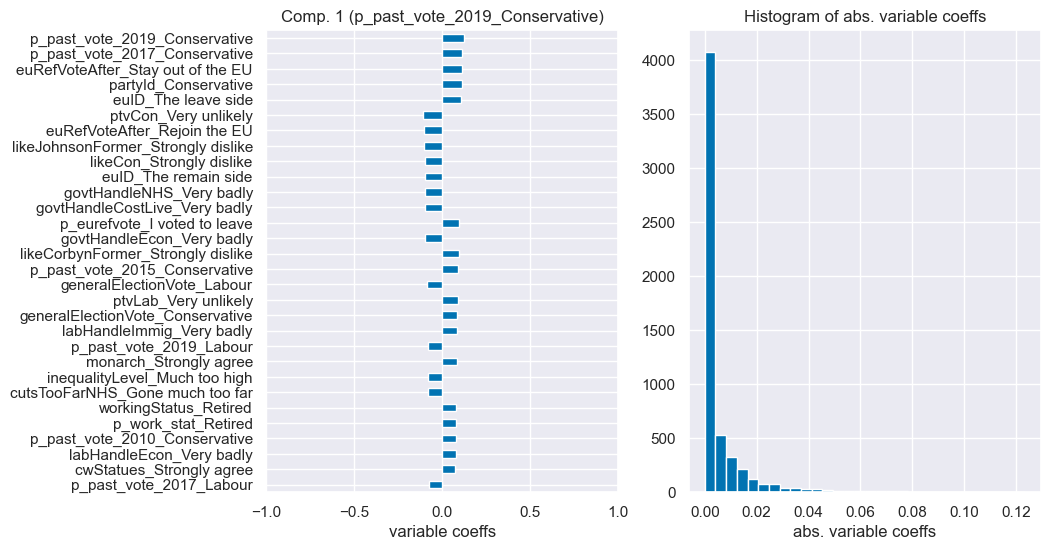

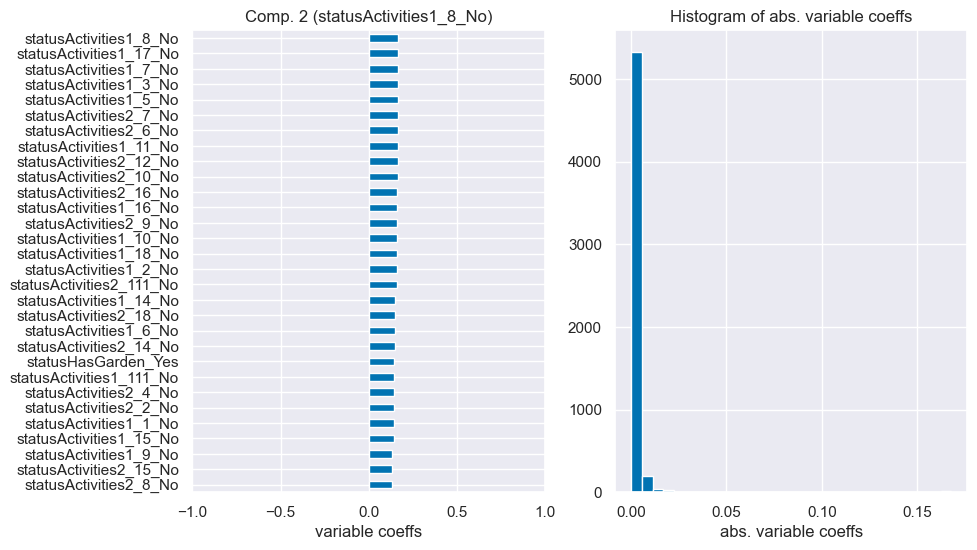

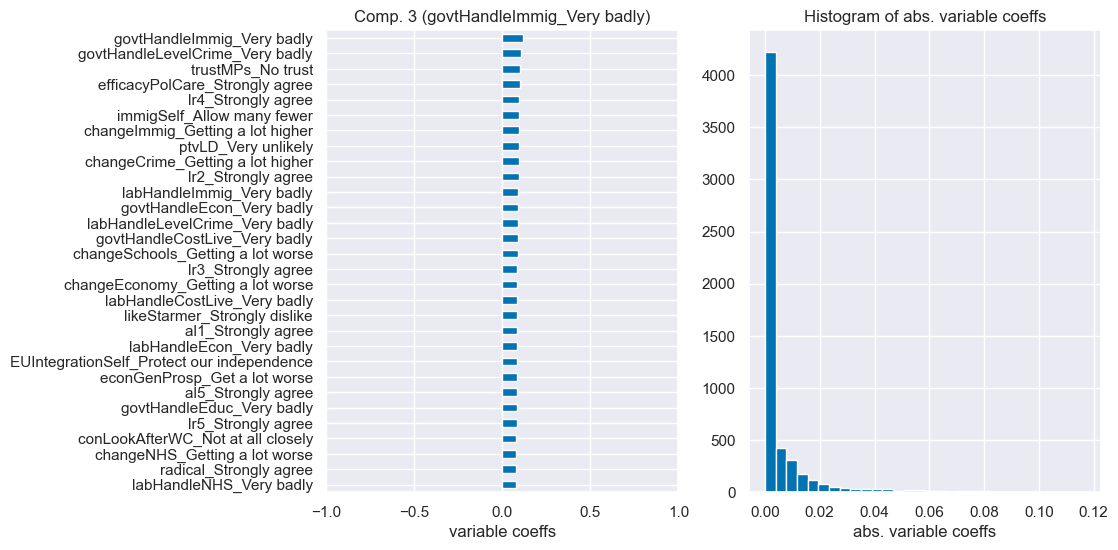

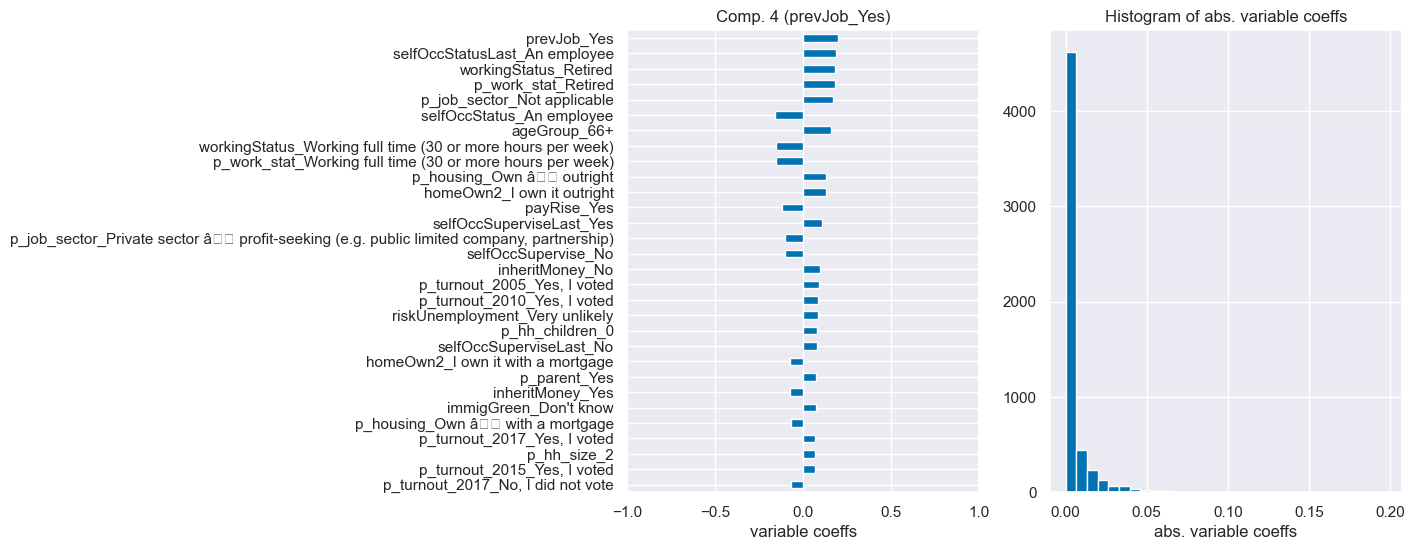

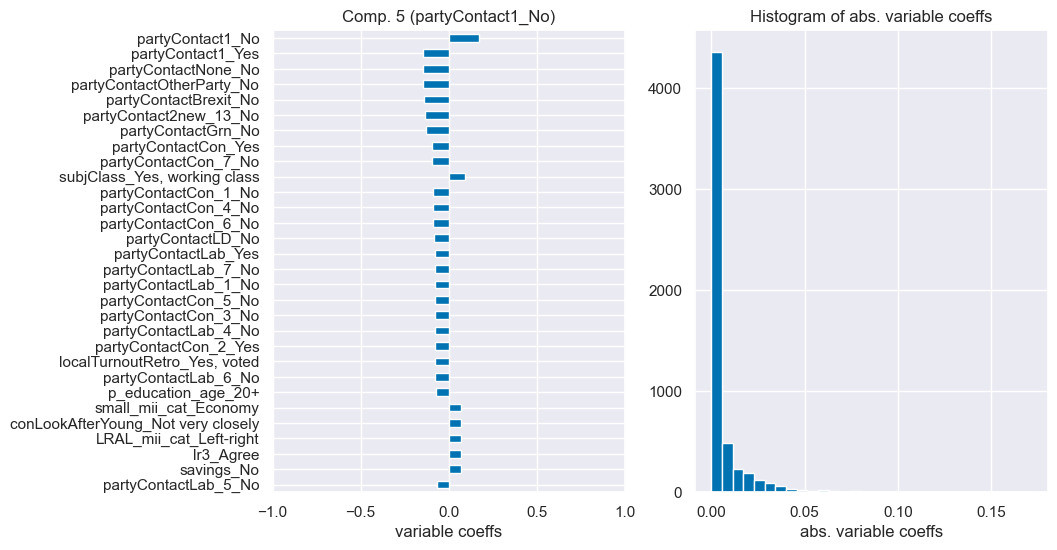

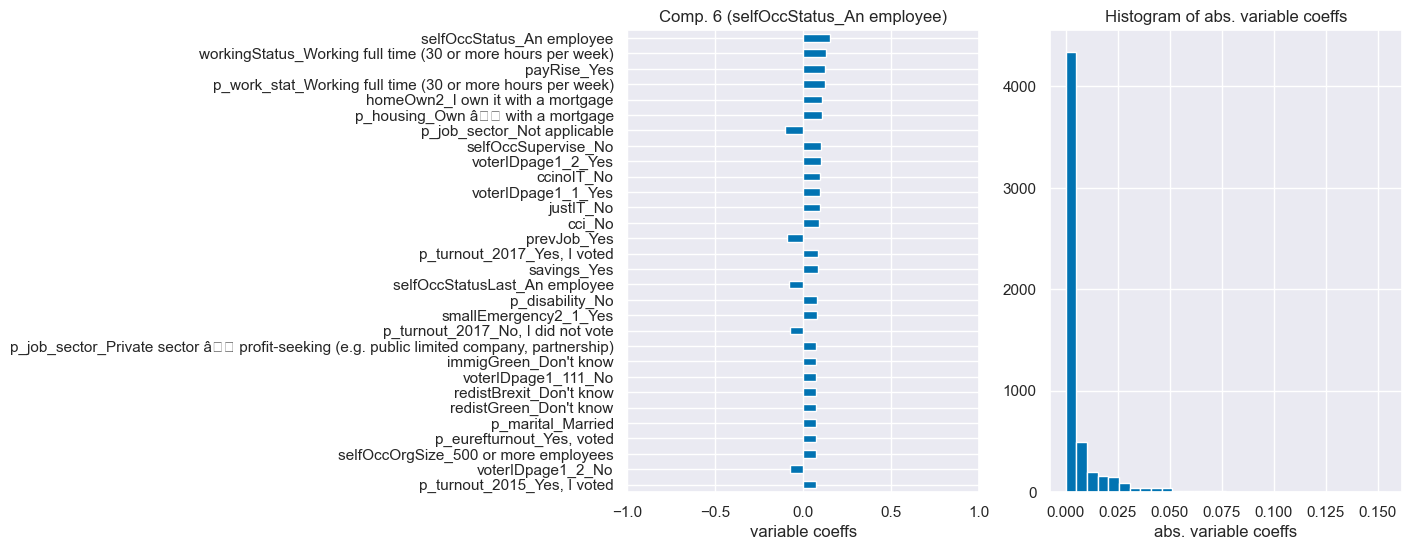

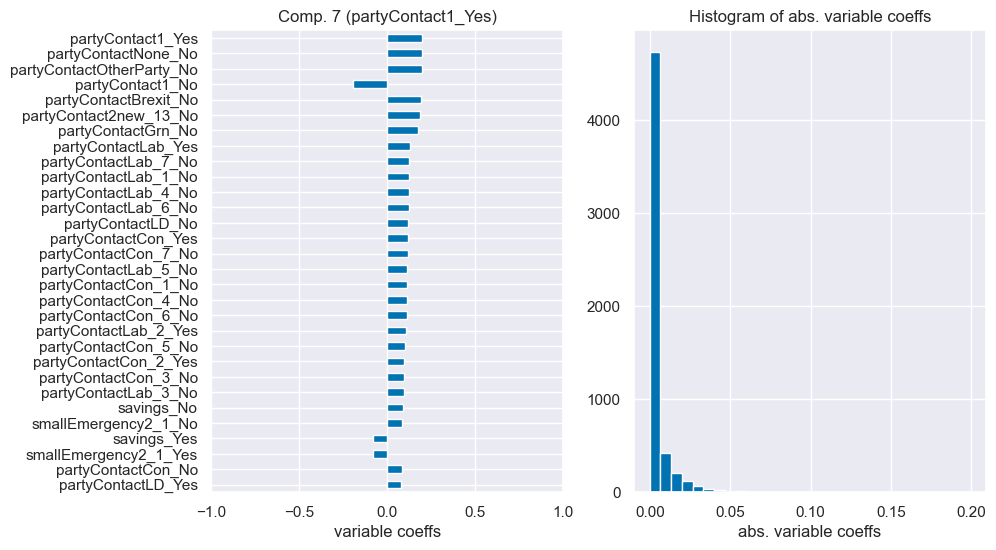

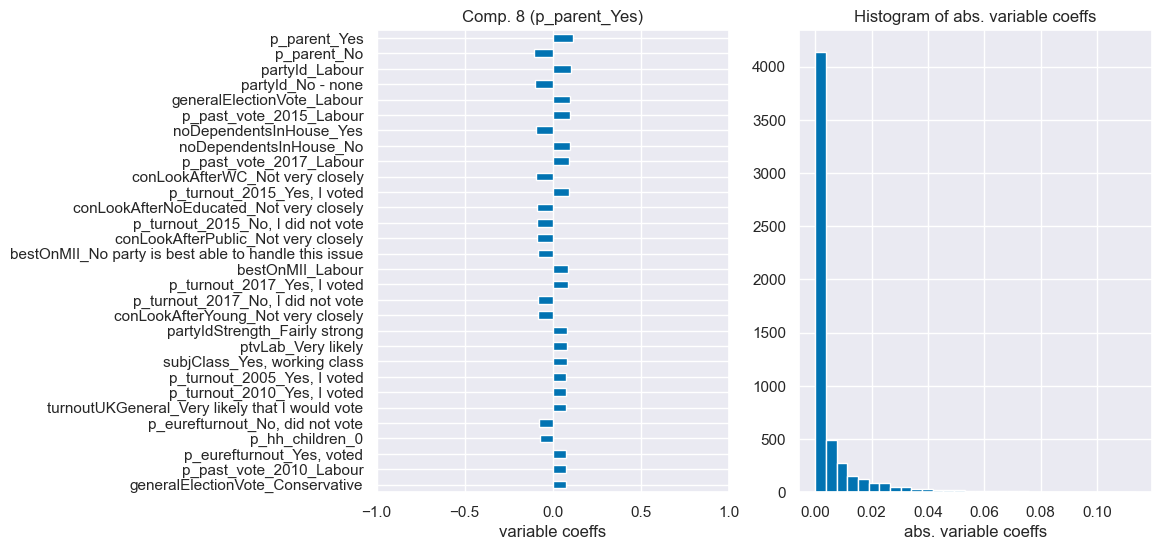

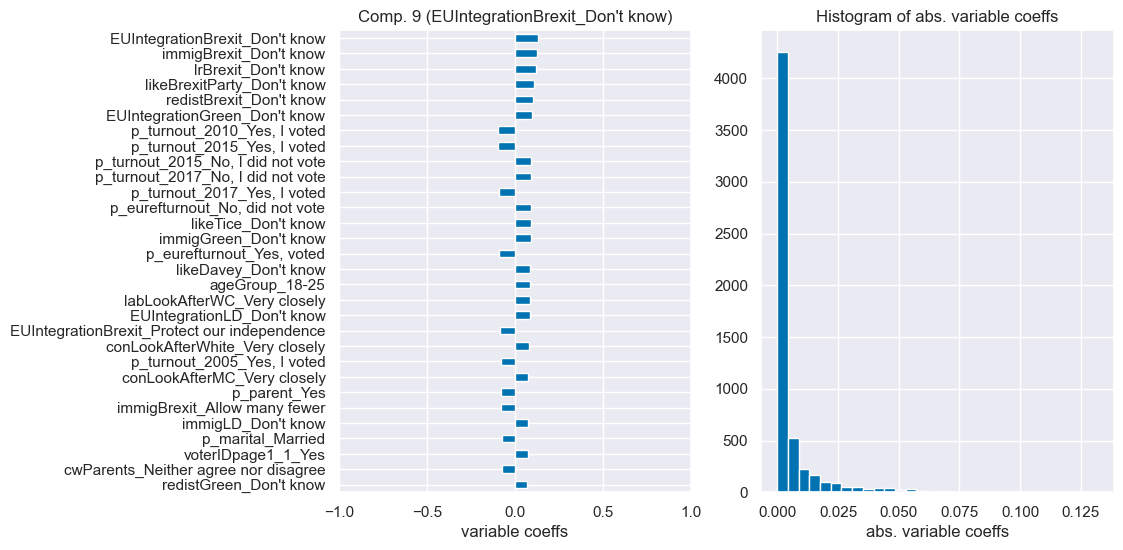

In [6]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

decomp = PCA(svd_solver="full",n_components =n_components )
# decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

In [ ]:
# W25
# partnerOcc variables
# some welsh/private school variables with W1_/anyUniW21W22W23
# statusArea(Edu|Spaces|Shops|Crime|Spirit) - local area stuff + which supermarket!
# statusActivities_1/_2 - nig binary list of activities you have participated in (look like a mix of high/low status?)
# environ<thing> - which should the govt spend more/less of its environment budget on?
# defenceSpend<thing> - same but def budget

# payRise/payRiseAmount

# inequalityLevel diff between rich and poor ppl too high-about right-too low

# discrimGay/Trans added to discrim list
# integrtity/competentSunak added to list

# cw<thing> - agree-disagree for Culture War statements

# <party>LookAfter(Public|Private) sector added to list
# (govt|lab)HandlePollution Air and water pollution added to list

# voteMethodb|askedForID|attemptTurnout|reasonForTurnaway|reasonNonVoter - how did you vote in locals|asked for id|tried to vote|tried to vote but turned away why/didn't vote why
# mayoral election choices
# goodConductLocals conducted fairly-unfairly
# voterID bunch of variables about voterID in local elections

# pubPrivEfficient|nationalize<thing> - public vs private section/nationalisation
# likeYousaf|likeCorbynFormer|SturgeonFormer


# changeSchools - doesn't appear in document????

Top 20 positive (spearman) correlations for payRiseAmount r p N 
 
 p_job_sector_Private sector â profit-seeking[...] 
 0.140000 
 0.00 
 7862 
 
 
 sector_Private sector firm of company Including,[...] 
 0.130000 
 0.00 
 7862 
 
 
 econGenProsp_Don't know 
 0.100000 
 0.00 
 7862 
 
 
 cutsTooFarLocal_Don't know 
 0.100000 
 0.00 
 7862 
 
 
 homeFinance_Don't know 
 0.100000 
 0.00 
 7862 
 
 
 natSecuritySpending_Don't know 
 0.090000 
 0.00 
 7862 
 
 
 goodConductLocals_Don't know 
 0.090000 
 0.00 
 7862 
 
 
 taxSpendSelf_Don't know 
 0.090000 
 0.00 
 7862 
 
 
 enviroProtection_Don't know 
 0.090000 
 0.00 
 7862 
 
 
 changeImmig_Don't know 
 0.090000 
 0.00 
 7862 
 
 
 selfOccOrgSize_Don't know 
 0.090000 
 0.00 
 7862 
 
 
 econPersonalProsp_Don't know 
 0.090000 
 0.00 
 7862 
 
 
 changeCrime_Don't know 
 0.090000 
 0.00 
 7862 
 
 
 econPersonalRetro_Got a lot better 
 0.090000 
 0.00 
 7862 
 
 
 pubPrivEfficient_Don't know 
 0.090000 
 0.00 
 7862 
 
 
 privatTooFar_Don't know 
 0.080000 
 0.00 
 7862 
 
 
 deficitReduce_Don't know 
 0.080000 
 0.00 
 7862 
 
 
 cutsTooFarNHS_Don't know 
 0.080000 
 0.00 
 7862 
 
 
 nationalizeTrains_Donât know 
 0.080000 
 0.00 
 7862 
 
 
 conUnited_Don't know 
 0.080000 
 0.00 
 7862 
 
 Top 20 negative (spearman) correlations for payRiseAmount r p N 
 
 sector_Other public sector employer Incl eg: -[...] 
 -0.160000 
 0.00 
 7862 
 
 
 p_job_sector_Public sector â government owned or[...] 
 -0.150000 
 0.00 
 7862 
 
 
 econPersonalProsp_Get a little worse 
 -0.080000 
 0.00 
 7862 
 
 
 econPersonalProsp_Get a lot worse 
 -0.080000 
 0.00 
 7862 
 
 
 currentUnionMemberW19__Yes 
 -0.080000 
 0.00 
 7862 
 
 
 ns_sec_L4.1 Traditional employees 
 -0.080000 
 0.00 
 7862 
 
 
 selfOccStatus_An employee 
 -0.070000 
 0.00 
 7862 
 
 
 econPersonalRetro_Got a little worse 
 -0.070000 
 0.00 
 7862 
 
 
 econPersonalRetro_Got a lot worse 
 -0.070000 
 0.00 
 7862 
 
 
 homeFinance_No one in my family could lend me[...] 
 -0.060000 
 0.00 
 7862 
 
 
 riskPoverty_Fairly likely 
 -0.060000 
 0.00 
 7862 
 
 
 conLookAfterPrivate_Very closely 
 -0.060000 
 0.00 
 7862 
 
 
 EconSecurityFuture_A little worse 
 -0.060000 
 0.00 
 7862 
 
 
 labLookAfterRetired_Fairly closely 
 -0.060000 
 0.00 
 7862 
 
 
 sectorPartnerW20_Other public sector employer[...] 
 -0.060000 
 0.00 
 7862 
 
 
 EUIntegrationGreen_5 
 -0.060000 
 0.00 
 7862 
 
 
 EUIntegrationLD_5 
 -0.060000 
 0.00 
 7862 
 
 
 selfOccOrgSize_500 or more employees 
 -0.060000 
 0.00 
 7862 
 
 
 labLookAfterPublic_Fairly closely 
 -0.060000 
 0.00 
 7862 
 
 
 labLookAfterNoEducated_Fairly closely 
 -0.060000 
 0.00 
 7862

MSE: 1.26, MAE: 0.85, EV: 0.09, R2: 0.08


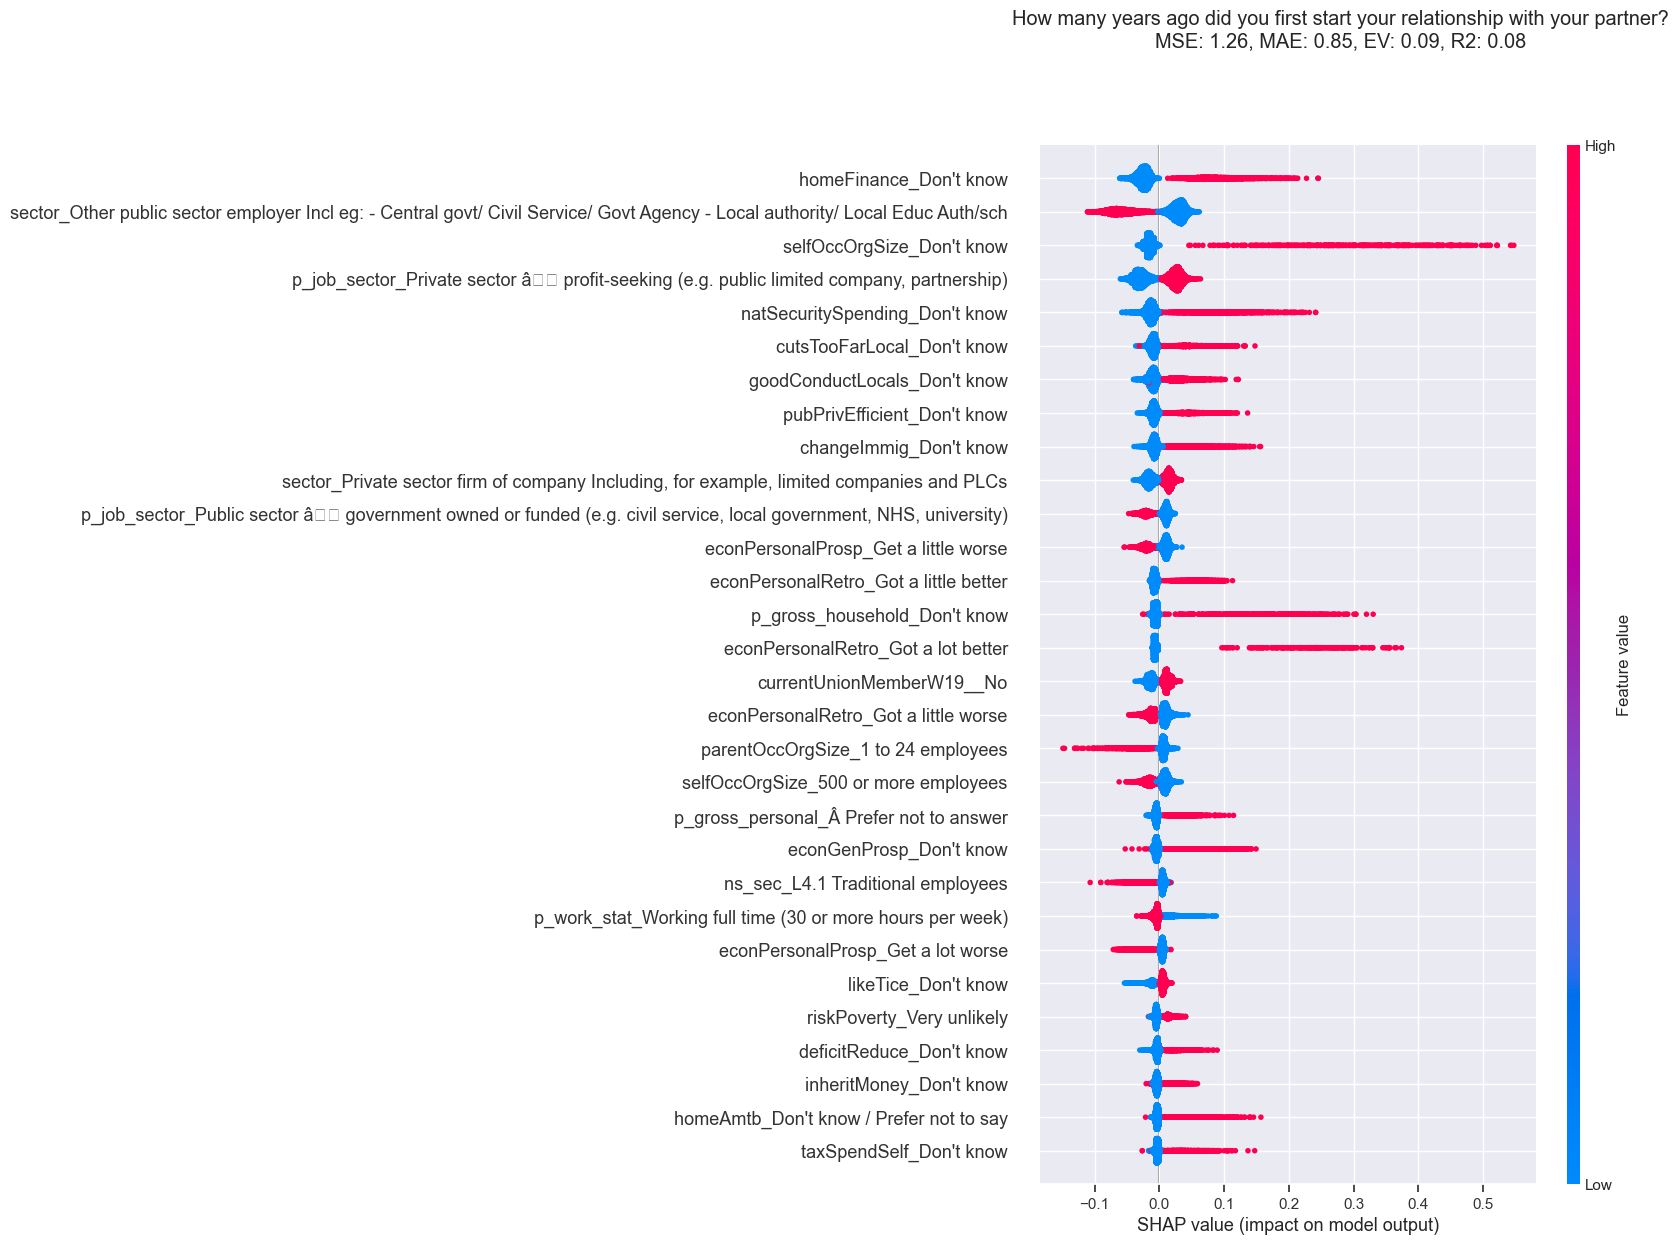

In [7]:
# payRiseAmount
name="payRiseAmount"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for inequalityLevel r p N 
 
 partyId_Conservative 
 0.360000 
 0.00 
 22371 
 
 
 generalElectionVote_Conservative 
 0.340000 
 0.00 
 22371 
 
 
 conLookAfterWC_Fairly closely 
 0.320000 
 0.00 
 22371 
 
 
 p_past_vote_2017_Conservative 
 0.310000 
 0.00 
 22371 
 
 
 p_past_vote_2019_Conservative 
 0.310000 
 0.00 
 22371 
 
 
 lr1_Strongly disagree 
 0.300000 
 0.00 
 22371 
 
 
 lr3_Disagree 
 0.300000 
 0.00 
 22371 
 
 
 lr3_Neither agree nor disagree 
 0.290000 
 0.00 
 22371 
 
 
 lr1_Disagree 
 0.290000 
 0.00 
 22371 
 
 
 cutsTooFarNational_About right 
 0.290000 
 0.00 
 22371 
 
 
 lr4_Disagree 
 0.290000 
 0.00 
 22371 
 
 
 conLookAfterNoEducated_Fairly closely 
 0.290000 
 0.00 
 22371 
 
 
 conLookAfterPublic_Fairly closely 
 0.280000 
 0.00 
 22371 
 
 
 p_past_vote_2015_Conservative 
 0.280000 
 0.00 
 22371 
 
 
 conLookAfterYoung_Fairly closely 
 0.280000 
 0.00 
 22371 
 
 
 bestOnMII_Conservative 
 0.280000 
 0.00 
 22371 
 
 
 cutsTooFarLocal_About right 
 0.280000 
 0.00 
 22371 
 
 
 privatTooFar_About right 
 0.280000 
 0.00 
 22371 
 
 
 ptvCon_Very likely 
 0.270000 
 0.00 
 22371 
 
 
 redistSelf_Government should be less concerned[...] 
 0.270000 
 0.00 
 22371 
 
 Top 20 negative (spearman) correlations for inequalityLevel r p N 
 
 lr4_Strongly agree 
 -0.440000 
 0.00 
 22371 
 
 
 lr3_Strongly agree 
 -0.440000 
 0.00 
 22371 
 
 
 likeCon_Strongly dislike 
 -0.410000 
 0.00 
 22371 
 
 
 govtHandleNHS_Very badly 
 -0.410000 
 0.00 
 22371 
 
 
 govtHandleCostLive_Very badly 
 -0.410000 
 0.00 
 22371 
 
 
 ptvCon_Very unlikely 
 -0.410000 
 0.00 
 22371 
 
 
 govtHandleEcon_Very badly 
 -0.390000 
 0.00 
 22371 
 
 
 likeJohnsonFormer_Strongly dislike 
 -0.380000 
 0.00 
 22371 
 
 
 privatTooFar_Gone much too far 
 -0.380000 
 0.00 
 22371 
 
 
 cutsTooFarNational_Gone much too far 
 -0.380000 
 0.00 
 22371 
 
 
 cutsTooFarNHS_Gone much too far 
 -0.380000 
 0.00 
 22371 
 
 
 conLookAfterWC_Not at all closely 
 -0.370000 
 0.00 
 22371 
 
 
 lr2_Strongly agree 
 -0.370000 
 0.00 
 22371 
 
 
 govtHandlePollution_Very badly 
 -0.360000 
 0.00 
 22371 
 
 
 lr1_Strongly agree 
 -0.360000 
 0.00 
 22371 
 
 
 changeEconomy_Getting a lot worse 
 -0.340000 
 0.00 
 22371 
 
 
 govtHandleEduc_Very badly 
 -0.340000 
 0.00 
 22371 
 
 
 econGenRetro_Got a lot worse 
 -0.330000 
 0.00 
 22371 
 
 
 conLookAfterPublic_Not at all closely 
 -0.330000 
 0.00 
 22371 
 
 
 conLookAfterYoung_Not at all closely 
 -0.320000 
 0.00 
 22371

MSE: 0.34, MAE: 0.42, EV: 0.47, R2: 0.47


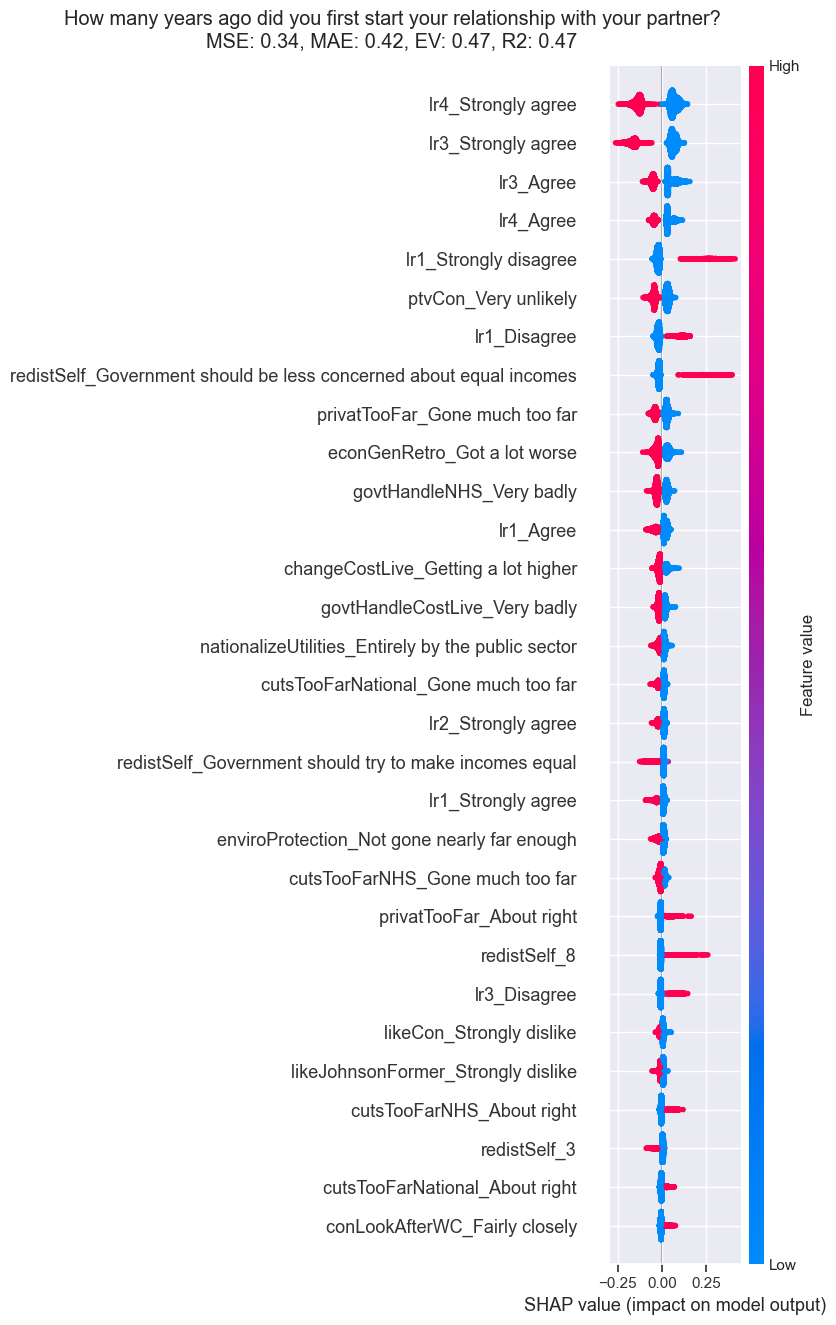

In [8]:
# inequalityLevel
name="inequalityLevel"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for discrimGay r p N 
 
 discrimTrans_A lot of discrimination against 
 0.460000 
 0.00 
 21790 
 
 
 discrimBME_A lot of discrimination against 
 0.290000 
 0.00 
 21790 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.280000 
 0.00 
 21790 
 
 
 euID_The remain side 
 0.260000 
 0.00 
 21790 
 
 
 discrimTrans_9 
 0.250000 
 0.00 
 21790 
 
 
 conLookAfterBA_Not at all closely 
 0.240000 
 0.00 
 21790 
 
 
 discrimTrans_8 
 0.240000 
 0.00 
 21790 
 
 
 discrimBME_8 
 0.240000 
 0.00 
 21790 
 
 
 cwParents_Agree 
 0.230000 
 0.00 
 21790 
 
 
 p_past_vote_2019_Labour 
 0.220000 
 0.00 
 21790 
 
 
 ptvCon_Very unlikely 
 0.220000 
 0.00 
 21790 
 
 
 cwParents_Strongly agree 
 0.220000 
 0.00 
 21790 
 
 
 likeCon_Strongly dislike 
 0.220000 
 0.00 
 21790 
 
 
 generalElectionVote_Labour 
 0.220000 
 0.00 
 21790 
 
 
 likeJohnsonFormer_Strongly dislike 
 0.210000 
 0.00 
 21790 
 
 
 cwAuthors_Agree 
 0.210000 
 0.00 
 21790 
 
 
 enviroProtection_Not gone nearly far enough 
 0.210000 
 0.00 
 21790 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 0.210000 
 0.00 
 21790 
 
 
 partyId_Labour 
 0.200000 
 0.00 
 21790 
 
 
 cutsTooFarNHS_Gone much too far 
 0.200000 
 0.00 
 21790 
 
 Top 20 negative (spearman) correlations for discrimGay r p N 
 
 discrimTrans_A lot of discrimination in favour 
 -0.430000 
 0.00 
 21790 
 
 
 cwTrans_Strongly disagree 
 -0.330000 
 0.00 
 21790 
 
 
 discrimBME_A lot of discrimination in favour 
 -0.320000 
 0.00 
 21790 
 
 
 cwAuthors_Strongly disagree 
 -0.300000 
 0.00 
 21790 
 
 
 cwParents_Strongly disagree 
 -0.300000 
 0.00 
 21790 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.290000 
 0.00 
 21790 
 
 
 labHandleImmig_Very badly 
 -0.290000 
 0.00 
 21790 
 
 
 cwStatues_Strongly agree 
 -0.280000 
 0.00 
 21790 
 
 
 labHandleEcon_Very badly 
 -0.270000 
 0.00 
 21790 
 
 
 euID_The leave side 
 -0.270000 
 0.00 
 21790 
 
 
 p_past_vote_2019_Conservative 
 -0.260000 
 0.00 
 21790 
 
 
 p_eurefvote_I voted to leave 
 -0.260000 
 0.00 
 21790 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.250000 
 0.00 
 21790 
 
 
 labLookAfterWhite_Not at all closely 
 -0.250000 
 0.00 
 21790 
 
 
 discrimTrans_2 
 -0.250000 
 0.00 
 21790 
 
 
 labHandleCostLive_Very badly 
 -0.250000 
 0.00 
 21790 
 
 
 cwLanguage_Strongly agree 
 -0.250000 
 0.00 
 21790 
 
 
 likeGrn_Strongly dislike 
 -0.240000 
 0.00 
 21790 
 
 
 labHandleLevelCrime_Very badly 
 -0.240000 
 0.00 
 21790 
 
 
 cwTraining_Strongly agree 
 -0.240000 
 0.00 
 21790

MSE: 1.54, MAE: 0.90, EV: 0.75, R2: 0.75


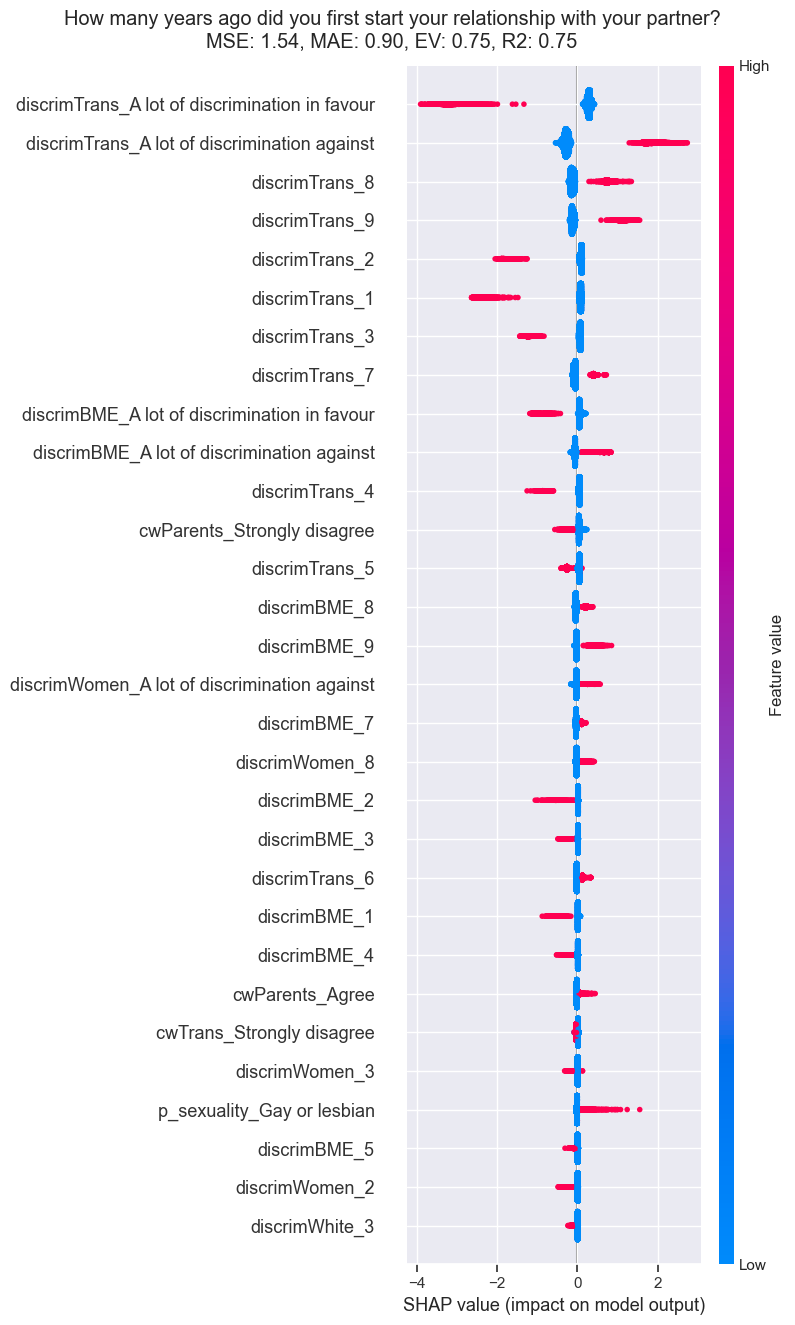

In [9]:
# discrimGay
name="discrimGay"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for discrimTrans r p N 
 
 discrimGay 
 0.820000 
 0.00 
 21147 
 
 
 discrimGay_A lot of discrimination against 
 0.340000 
 0.00 
 21377 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.340000 
 0.00 
 21377 
 
 
 euID_The remain side 
 0.330000 
 0.00 
 21377 
 
 
 discrimGay_8 
 0.300000 
 0.00 
 21377 
 
 
 conLookAfterBA_Not at all closely 
 0.290000 
 0.00 
 21377 
 
 
 discrimGay_7 
 0.280000 
 0.00 
 21377 
 
 
 discrimBME_A lot of discrimination against 
 0.280000 
 0.00 
 21377 
 
 
 ptvCon_Very unlikely 
 0.270000 
 0.00 
 21377 
 
 
 enviroProtection_Not gone nearly far enough 
 0.270000 
 0.00 
 21377 
 
 
 likeJohnsonFormer_Strongly dislike 
 0.270000 
 0.00 
 21377 
 
 
 likeCon_Strongly dislike 
 0.270000 
 0.00 
 21377 
 
 
 p_past_vote_2019_Labour 
 0.260000 
 0.00 
 21377 
 
 
 cwParents_Agree 
 0.260000 
 0.00 
 21377 
 
 
 generalElectionVote_Labour 
 0.260000 
 0.00 
 21377 
 
 
 discrimBME_8 
 0.260000 
 0.00 
 21377 
 
 
 cwParents_Strongly agree 
 0.260000 
 0.00 
 21377 
 
 
 cwTraining_Strongly disagree 
 0.260000 
 0.00 
 21377 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 0.250000 
 0.00 
 21377 
 
 
 al2_Strongly disagree 
 0.250000 
 0.00 
 21377 
 
 Top 20 negative (spearman) correlations for discrimTrans r p N 
 
 discrimGay_A lot of discrimination in favour 
 -0.400000 
 0.00 
 21377 
 
 
 cwTrans_Strongly disagree 
 -0.380000 
 0.00 
 21377 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.350000 
 0.00 
 21377 
 
 
 labHandleImmig_Very badly 
 -0.340000 
 0.00 
 21377 
 
 
 euID_The leave side 
 -0.330000 
 0.00 
 21377 
 
 
 discrimBME_A lot of discrimination in favour 
 -0.330000 
 0.00 
 21377 
 
 
 cwStatues_Strongly agree 
 -0.320000 
 0.00 
 21377 
 
 
 cwAuthors_Strongly disagree 
 -0.320000 
 0.00 
 21377 
 
 
 p_eurefvote_I voted to leave 
 -0.310000 
 0.00 
 21377 
 
 
 labHandleEcon_Very badly 
 -0.310000 
 0.00 
 21377 
 
 
 cwParents_Strongly disagree 
 -0.310000 
 0.00 
 21377 
 
 
 p_past_vote_2019_Conservative 
 -0.310000 
 0.00 
 21377 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.290000 
 0.00 
 21377 
 
 
 cwLanguage_Strongly agree 
 -0.290000 
 0.00 
 21377 
 
 
 ptvLab_Very unlikely 
 -0.280000 
 0.00 
 21377 
 
 
 cwTraining_Strongly agree 
 -0.280000 
 0.00 
 21377 
 
 
 likeCorbynFormer_Strongly dislike 
 -0.280000 
 0.00 
 21377 
 
 
 labLookAfterWhite_Not at all closely 
 -0.280000 
 0.00 
 21377 
 
 
 changeImmig_Getting a lot higher 
 -0.280000 
 0.00 
 21377 
 
 
 labHandleLevelCrime_Very badly 
 -0.280000 
 0.00 
 21377

MSE: 2.21, MAE: 1.00, EV: 0.76, R2: 0.76


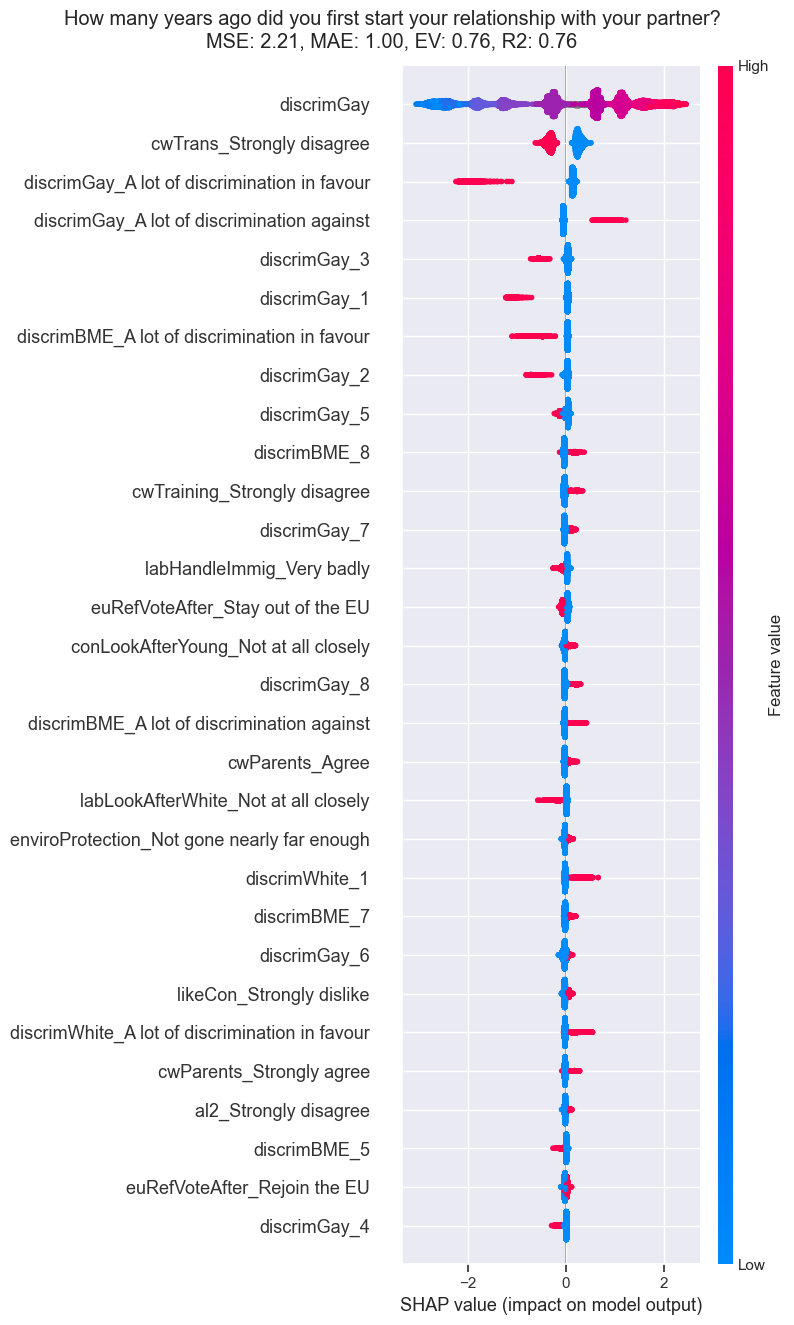

In [10]:
# discrimTrans
name="discrimTrans"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for pubPrivEfficient r p N 
 
 nationalizeUtilities_Entirely by the public sector 
 0.530000 
 0.00 
 20890 
 
 
 privatTooFar_Gone much too far 
 0.500000 
 0.00 
 20890 
 
 
 nationalizeTrains_Entirely by the public sector 
 0.490000 
 0.00 
 20890 
 
 
 nationalizeHospitals_Entirely by the public sector 
 0.390000 
 0.00 
 20890 
 
 
 inequalityLevel_Much too high 
 0.390000 
 0.00 
 20890 
 
 
 cutsTooFarNational_Gone much too far 
 0.370000 
 0.00 
 20890 
 
 
 ptvCon_Very unlikely 
 0.370000 
 0.00 
 20890 
 
 
 likeCon_Strongly dislike 
 0.360000 
 0.00 
 20890 
 
 
 cutsTooFarNHS_Gone much too far 
 0.360000 
 0.00 
 20890 
 
 
 nationalizeSchools_Entirely by the public sector 
 0.350000 
 0.00 
 20890 
 
 
 govtHandleNHS_Very badly 
 0.340000 
 0.00 
 20890 
 
 
 lr3_Strongly agree 
 0.330000 
 0.00 
 20890 
 
 
 govtHandleCostLive_Very badly 
 0.330000 
 0.00 
 20890 
 
 
 likeJohnsonFormer_Strongly dislike 
 0.330000 
 0.00 
 20890 
 
 
 govtHandlePollution_Very badly 
 0.330000 
 0.00 
 20890 
 
 
 lr4_Strongly agree 
 0.330000 
 0.00 
 20890 
 
 
 govtHandleEcon_Very badly 
 0.330000 
 0.00 
 20890 
 
 
 lr2_Strongly agree 
 0.310000 
 0.00 
 20890 
 
 
 conLookAfterPublic_Not at all closely 
 0.310000 
 0.00 
 20890 
 
 
 cutsTooFarLocal_Gone much too far 
 0.310000 
 0.00 
 20890 
 
 Top 20 negative (spearman) correlations for pubPrivEfficient r p N 
 
 inequalityLevel 
 -0.410000 
 0.00 
 19165 
 
 
 privatTooFar_About right 
 -0.340000 
 0.00 
 20890 
 
 
 partyId_Conservative 
 -0.290000 
 0.00 
 20890 
 
 
 nationalizeUtilities_Mostly by the private sector 
 -0.290000 
 0.00 
 20890 
 
 
 p_past_vote_2017_Conservative 
 -0.270000 
 0.00 
 20890 
 
 
 p_past_vote_2015_Conservative 
 -0.260000 
 0.00 
 20890 
 
 
 nationalizeUtilities_Equally by the public and[...] 
 -0.260000 
 0.00 
 20890 
 
 
 generalElectionVote_Conservative 
 -0.250000 
 0.00 
 20890 
 
 
 inequalityLevel_About right 
 -0.250000 
 0.00 
 20890 
 
 
 nationalizeTrains_Mostly by the private sector 
 -0.250000 
 0.00 
 20890 
 
 
 conLookAfterWC_Fairly closely 
 -0.250000 
 0.00 
 20890 
 
 
 nationalizeTrains_Equally by the public and[...] 
 -0.240000 
 0.00 
 20890 
 
 
 cutsTooFarLocal_About right 
 -0.240000 
 0.00 
 20890 
 
 
 nationalizeUtilities_Entirely by the private[...] 
 -0.240000 
 0.00 
 20890 
 
 
 p_past_vote_2019_Conservative 
 -0.240000 
 0.00 
 20890 
 
 
 cutsTooFarNational_About right 
 -0.230000 
 0.00 
 20890 
 
 
 nationalizeHospitals_Equally by the public and[...] 
 -0.230000 
 0.00 
 20890 
 
 
 conLookAfterPublic_Fairly closely 
 -0.230000 
 0.00 
 20890 
 
 
 bestOnMII_Conservative 
 -0.230000 
 0.00 
 20890 
 
 
 conLookAfterNoEducated_Fairly closely 
 -0.220000 
 0.00 
 20890

MSE: 3.90, MAE: 1.47, EV: 0.49, R2: 0.49


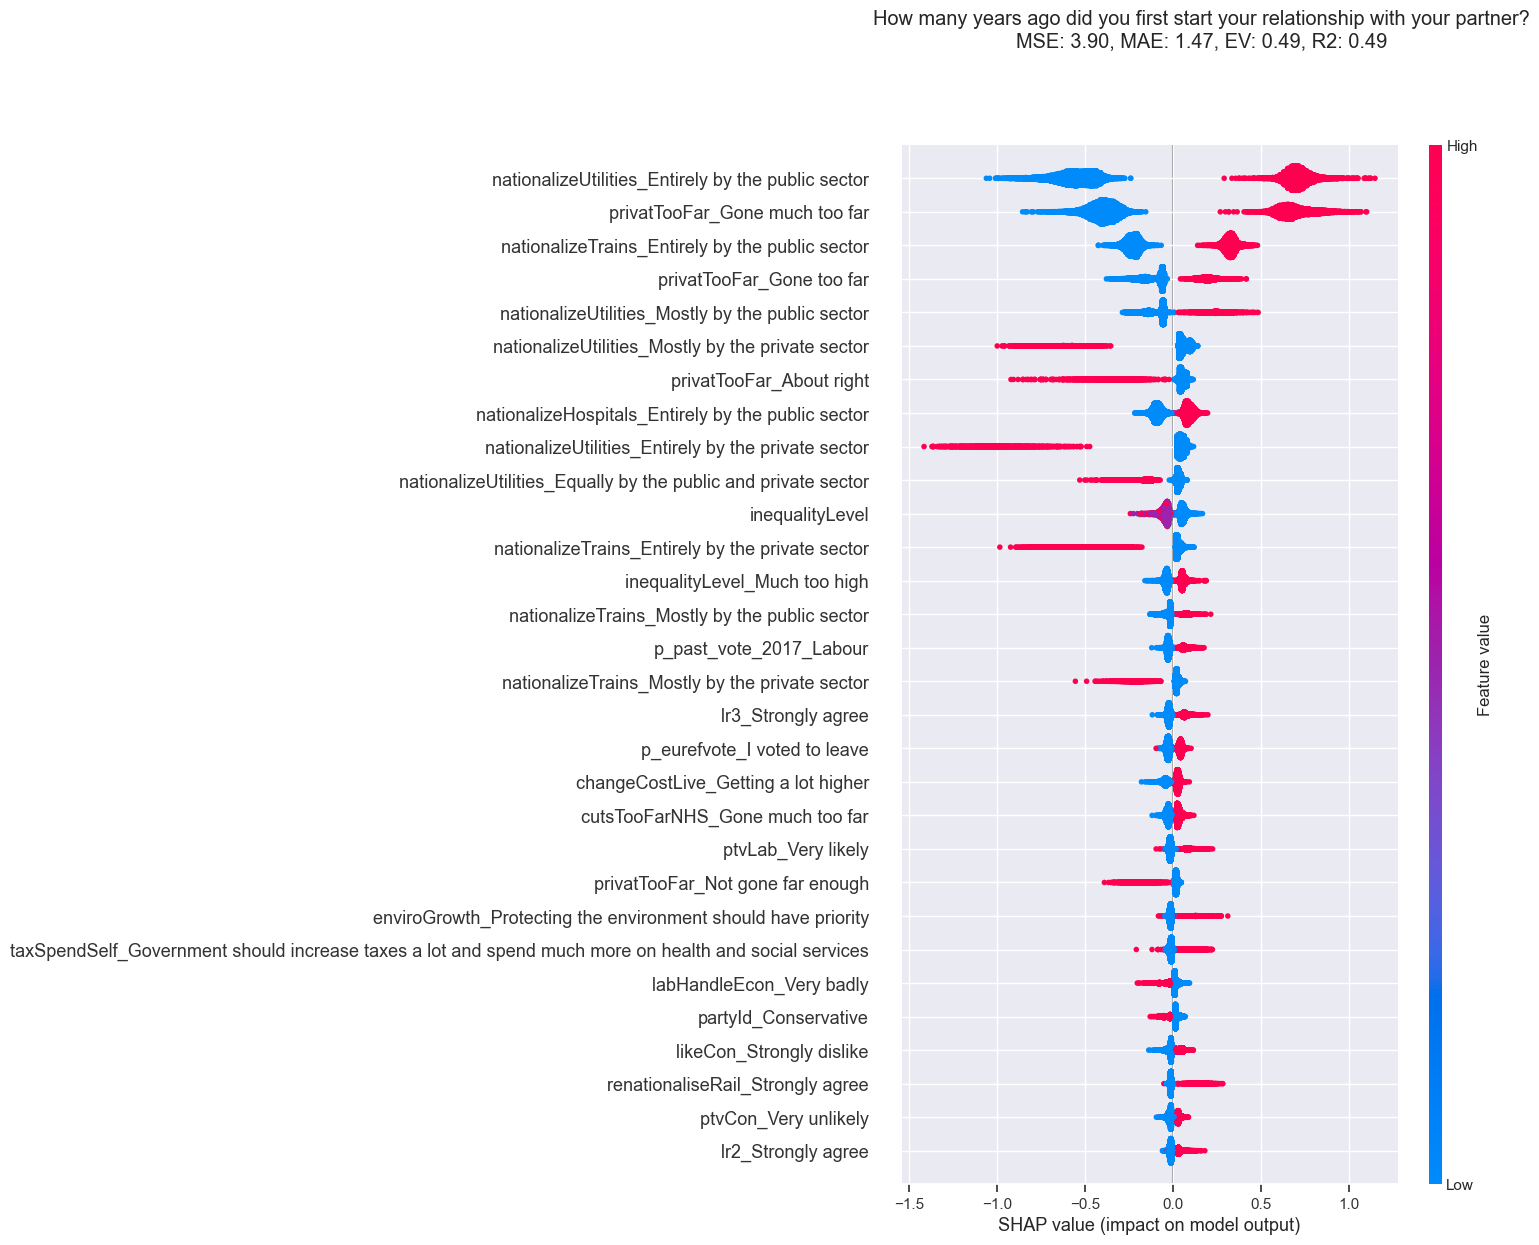

In [11]:
# pubPrivEfficient
name="pubPrivEfficient"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for changeSchools r p N 
 
 changeNHS_Staying about the same 
 0.310000 
 0.00 
 22106 
 
 
 govtHandleEduc_Neither well nor badly 
 0.290000 
 0.00 
 22106 
 
 
 govtHandleEduc_Fairly well 
 0.270000 
 0.00 
 22106 
 
 
 inequalityLevel 
 0.270000 
 0.00 
 19981 
 
 
 changeNHS_Getting a little worse 
 0.240000 
 0.00 
 22106 
 
 
 cutsTooFarLocal_About right 
 0.210000 
 0.00 
 22106 
 
 
 changeEconomy_Staying about the same 
 0.210000 
 0.00 
 22106 
 
 
 cutsTooFarNational_About right 
 0.200000 
 0.00 
 22106 
 
 
 changeEconomy_Getting a little better 
 0.190000 
 0.00 
 22106 
 
 
 generalElectionVote_Conservative 
 0.190000 
 0.00 
 22106 
 
 
 changeNHS_Getting a little better 
 0.190000 
 0.00 
 22106 
 
 
 govtHandleLevelCrime_Fairly well 
 0.190000 
 0.00 
 22106 
 
 
 privatTooFar_About right 
 0.190000 
 0.00 
 22106 
 
 
 changeCrime_Staying about the same 
 0.190000 
 0.00 
 22106 
 
 
 govtHandleNHS_Neither well nor badly 
 0.190000 
 0.00 
 22106 
 
 
 changeCostLive_Getting a little higher 
 0.190000 
 0.00 
 22106 
 
 
 econGenProsp_Get a little better 
 0.180000 
 0.00 
 22106 
 
 
 govtHandleNHS_Fairly well 
 0.180000 
 0.00 
 22106 
 
 
 cutsTooFarNHS_About right 
 0.180000 
 0.00 
 22106 
 
 
 govtHandleLevelCrime_Neither well nor badly 
 0.180000 
 0.00 
 22106 
 
 Top 20 negative (spearman) correlations for changeSchools r p N 
 
 changeNHS_Getting a lot worse 
 -0.490000 
 0.00 
 22106 
 
 
 govtHandleEduc_Very badly 
 -0.470000 
 0.00 
 22106 
 
 
 changeEconomy_Getting a lot worse 
 -0.390000 
 0.00 
 22106 
 
 
 govtHandleNHS_Very badly 
 -0.360000 
 0.00 
 22106 
 
 
 govtHandleLevelCrime_Very badly 
 -0.340000 
 0.00 
 22106 
 
 
 govtHandleEcon_Very badly 
 -0.330000 
 0.00 
 22106 
 
 
 govtHandleImmig_Very badly 
 -0.320000 
 0.00 
 22106 
 
 
 govtHandlePollution_Very badly 
 -0.310000 
 0.00 
 22106 
 
 
 govtHandleCostLive_Very badly 
 -0.300000 
 0.00 
 22106 
 
 
 econGenRetro_Got a lot worse 
 -0.300000 
 0.00 
 22106 
 
 
 econGenProsp_Get a lot worse 
 -0.300000 
 0.00 
 22106 
 
 
 cutsTooFarNational_Gone much too far 
 -0.300000 
 0.00 
 22106 
 
 
 cutsTooFarLocal_Gone much too far 
 -0.290000 
 0.00 
 22106 
 
 
 cutsTooFarNHS_Gone much too far 
 -0.280000 
 0.00 
 22106 
 
 
 conLookAfterWC_Not at all closely 
 -0.270000 
 0.00 
 22106 
 
 
 likeCon_Strongly dislike 
 -0.270000 
 0.00 
 22106 
 
 
 privatTooFar_Gone much too far 
 -0.270000 
 0.00 
 22106 
 
 
 ptvCon_Very unlikely 
 -0.260000 
 0.00 
 22106 
 
 
 inequalityLevel_Much too high 
 -0.260000 
 0.00 
 22106 
 
 
 trustMPs_No trust 
 -0.260000 
 0.00 
 22106

MSE: 0.39, MAE: 0.48, EV: 0.48, R2: 0.48


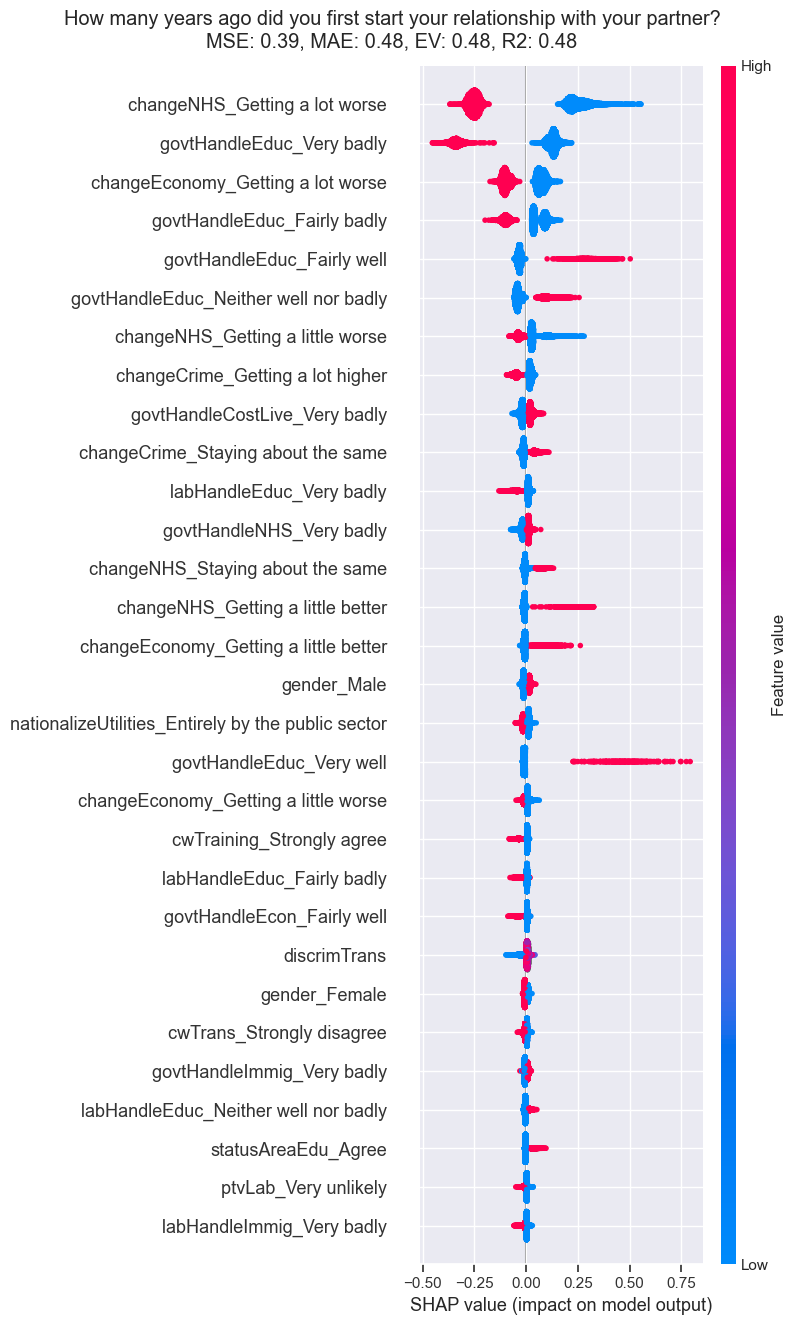

In [12]:
# changeSchools
name="changeSchools"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

In [15]:
# # likeYousaf
# name="likeYousaf"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
# df, corr_type = make_corr_summary(BES_num, name)
# display_corr(df,name,corr_type)

# (explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
#     title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
#                                                     var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for likeCorbynFormer r p N 
 
 p_past_vote_2019_Labour 
 0.490000 
 0.00 
 23996 
 
 
 p_past_vote_2017_Labour 
 0.420000 
 0.00 
 23996 
 
 
 partyId_Labour 
 0.410000 
 0.00 
 23996 
 
 
 generalElectionVote_Labour 
 0.400000 
 0.00 
 23996 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.380000 
 0.00 
 23996 
 
 
 euID_The remain side 
 0.370000 
 0.00 
 23996 
 
 
 ptvCon_Very unlikely 
 0.370000 
 0.00 
 23996 
 
 
 likeCon_Strongly dislike 
 0.350000 
 0.00 
 23996 
 
 
 bestOnMII_Labour 
 0.340000 
 0.00 
 23996 
 
 
 discrimTrans 
 0.320000 
 0.00 
 20713 
 
 
 labHandleEcon_Fairly well 
 0.320000 
 0.00 
 23996 
 
 
 labHandleCostLive_Fairly well 
 0.320000 
 0.00 
 23996 
 
 
 ptvLab_Very likely 
 0.310000 
 0.00 
 23996 
 
 
 p_past_vote_2015_Labour 
 0.310000 
 0.00 
 23996 
 
 
 conLookAfterBA_Not at all closely 
 0.300000 
 0.00 
 23996 
 
 
 labLookAfterMC_Fairly closely 
 0.290000 
 0.00 
 23996 
 
 
 labHandleImmig_Fairly well 
 0.280000 
 0.00 
 23996 
 
 
 discrimGay 
 0.280000 
 0.00 
 21128 
 
 
 conLookAfterYoung_Not at all closely 
 0.270000 
 0.00 
 23996 
 
 
 EUIntegrationSelf_Unite fully with the European[...] 
 0.270000 
 0.00 
 23996 
 
 Top 20 negative (spearman) correlations for likeCorbynFormer r p N 
 
 p_past_vote_2019_Conservative 
 -0.490000 
 0.00 
 23996 
 
 
 p_past_vote_2017_Conservative 
 -0.470000 
 0.00 
 23996 
 
 
 ptvLab_Very unlikely 
 -0.450000 
 0.00 
 23996 
 
 
 partyId_Conservative 
 -0.410000 
 0.00 
 23996 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.410000 
 0.00 
 23996 
 
 
 labHandleImmig_Very badly 
 -0.410000 
 0.00 
 23996 
 
 
 labHandleEcon_Very badly 
 -0.400000 
 0.00 
 23996 
 
 
 likeLab_Strongly dislike 
 -0.400000 
 0.00 
 23996 
 
 
 euID_The leave side 
 -0.380000 
 0.00 
 23996 
 
 
 ptvGrn_Very unlikely 
 -0.380000 
 0.00 
 23996 
 
 
 p_past_vote_2015_Conservative 
 -0.370000 
 0.00 
 23996 
 
 
 labHandleCostLive_Very badly 
 -0.360000 
 0.00 
 23996 
 
 
 p_eurefvote_I voted to leave 
 -0.350000 
 0.00 
 23996 
 
 
 monarch_Strongly agree 
 -0.350000 
 0.00 
 23996 
 
 
 labHandleLevelCrime_Very badly 
 -0.350000 
 0.00 
 23996 
 
 
 likeStarmer_Strongly dislike 
 -0.340000 
 0.00 
 23996 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.340000 
 0.00 
 23996 
 
 
 p_past_vote_2010_Conservative 
 -0.340000 
 0.00 
 23996 
 
 
 cwStatues_Strongly agree 
 -0.330000 
 0.00 
 23996 
 
 
 generalElectionVote_Conservative 
 -0.320000 
 0.00 
 23996

MSE: 3.99, MAE: 1.45, EV: 0.59, R2: 0.59


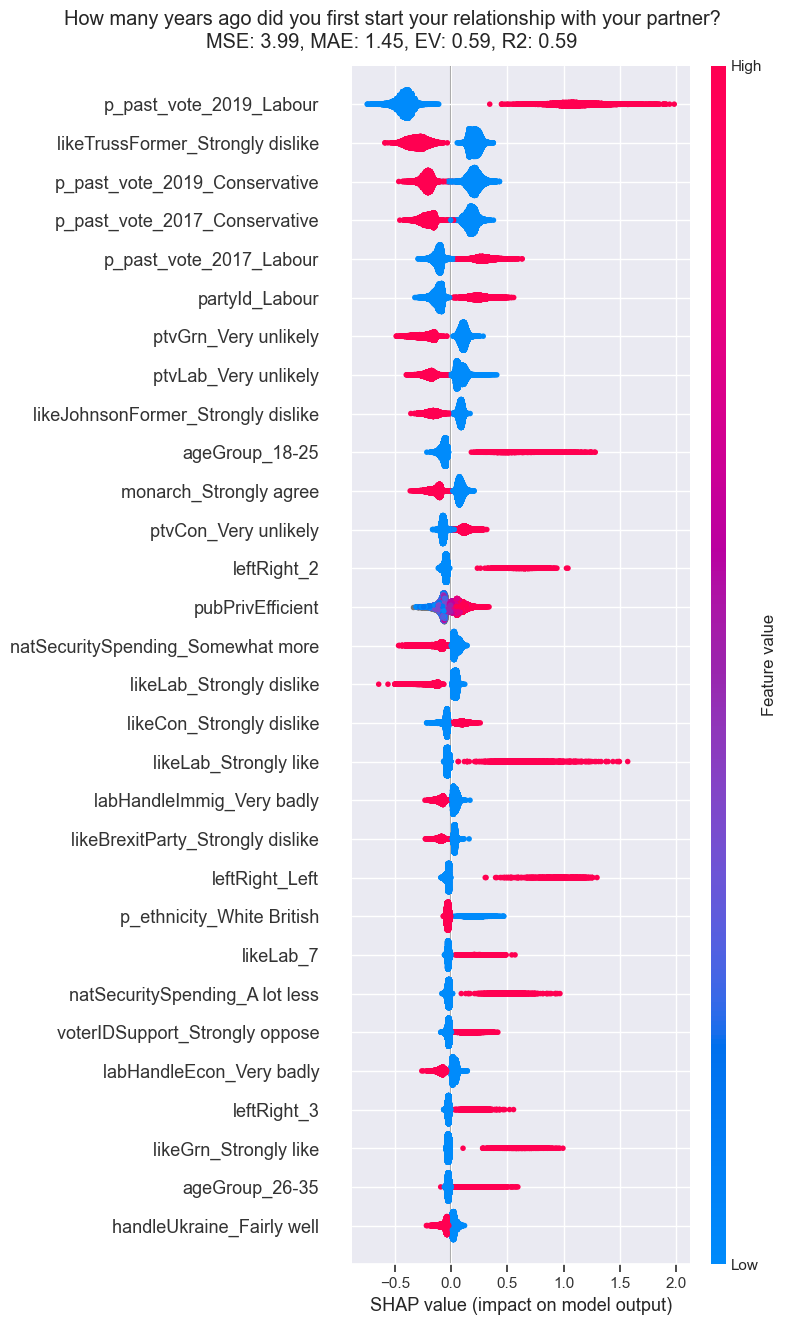

In [17]:
# likeCorbynFormer
name="likeCorbynFormer"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

In [16]:
# # likeSturgeonFormer
# name="likeSturgeonFormer"

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
# df, corr_type = make_corr_summary(BES_num, name)
# display_corr(df,name,corr_type)

# (explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
#     title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
#                                                     var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for govtHandlePollution r p N 
 
 inequalityLevel 
 0.430000 
 0.00 
 20067 
 
 
 generalElectionVote_Conservative 
 0.380000 
 0.00 
 22130 
 
 
 changeSchools 
 0.350000 
 0.00 
 19992 
 
 
 partyId_Conservative 
 0.350000 
 0.00 
 22130 
 
 
 p_past_vote_2019_Conservative 
 0.350000 
 0.00 
 22130 
 
 
 conLookAfterYoung_Fairly closely 
 0.320000 
 0.00 
 22130 
 
 
 enviroProtection_About right 
 0.320000 
 0.00 
 22130 
 
 
 bestOnMII_Conservative 
 0.310000 
 0.00 
 22130 
 
 
 conLookAfterWC_Fairly closely 
 0.310000 
 0.00 
 22130 
 
 
 p_past_vote_2017_Conservative 
 0.310000 
 0.00 
 22130 
 
 
 govtHandleEduc_Neither well nor badly 
 0.310000 
 0.00 
 22130 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.310000 
 0.00 
 22130 
 
 
 govtHandleEcon_Fairly well 
 0.310000 
 0.00 
 22130 
 
 
 ptvCon_Very likely 
 0.300000 
 0.00 
 22130 
 
 
 govtHandleEduc_Fairly well 
 0.300000 
 0.00 
 22130 
 
 
 conLookAfterPublic_Fairly closely 
 0.290000 
 0.00 
 22130 
 
 
 govtHandleNHS_Neither well nor badly 
 0.290000 
 0.00 
 22130 
 
 
 euID_The leave side 
 0.290000 
 0.00 
 22130 
 
 
 conLookAfterNoEducated_Fairly closely 
 0.280000 
 0.00 
 22130 
 
 
 cutsTooFarLocal_About right 
 0.280000 
 0.00 
 22130 
 
 Top 20 negative (spearman) correlations for govtHandlePollution r p N 
 
 govtHandleNHS_Very badly 
 -0.530000 
 0.00 
 22130 
 
 
 govtHandleEduc_Very badly 
 -0.520000 
 0.00 
 22130 
 
 
 govtHandleEcon_Very badly 
 -0.510000 
 0.00 
 22130 
 
 
 likeJohnsonFormer_Strongly dislike 
 -0.490000 
 0.00 
 22130 
 
 
 govtHandleCostLive_Very badly 
 -0.480000 
 0.00 
 22130 
 
 
 likeCon_Strongly dislike 
 -0.480000 
 0.00 
 22130 
 
 
 ptvCon_Very unlikely 
 -0.470000 
 0.00 
 22130 
 
 
 govtHandleImmig_Very badly 
 -0.430000 
 0.00 
 22130 
 
 
 govtHandleLevelCrime_Very badly 
 -0.430000 
 0.00 
 22130 
 
 
 enviroProtection_Not gone nearly far enough 
 -0.420000 
 0.00 
 22130 
 
 
 cutsTooFarNational_Gone much too far 
 -0.410000 
 0.00 
 22130 
 
 
 conLookAfterYoung_Not at all closely 
 -0.400000 
 0.00 
 22130 
 
 
 conLookAfterWC_Not at all closely 
 -0.400000 
 0.00 
 22130 
 
 
 inequalityLevel_Much too high 
 -0.400000 
 0.00 
 22130 
 
 
 privatTooFar_Gone much too far 
 -0.390000 
 0.00 
 22130 
 
 
 conLookAfterPublic_Not at all closely 
 -0.390000 
 0.00 
 22130 
 
 
 likeTrussFormer_Strongly dislike 
 -0.390000 
 0.00 
 22130 
 
 
 cutsTooFarNHS_Gone much too far 
 -0.380000 
 0.00 
 22130 
 
 
 conLookAfterBA_Not at all closely 
 -0.360000 
 0.00 
 22130 
 
 
 likeSunak_Strongly dislike 
 -0.350000 
 0.00 
 22130

MSE: 0.48, MAE: 0.52, EV: 0.56, R2: 0.56


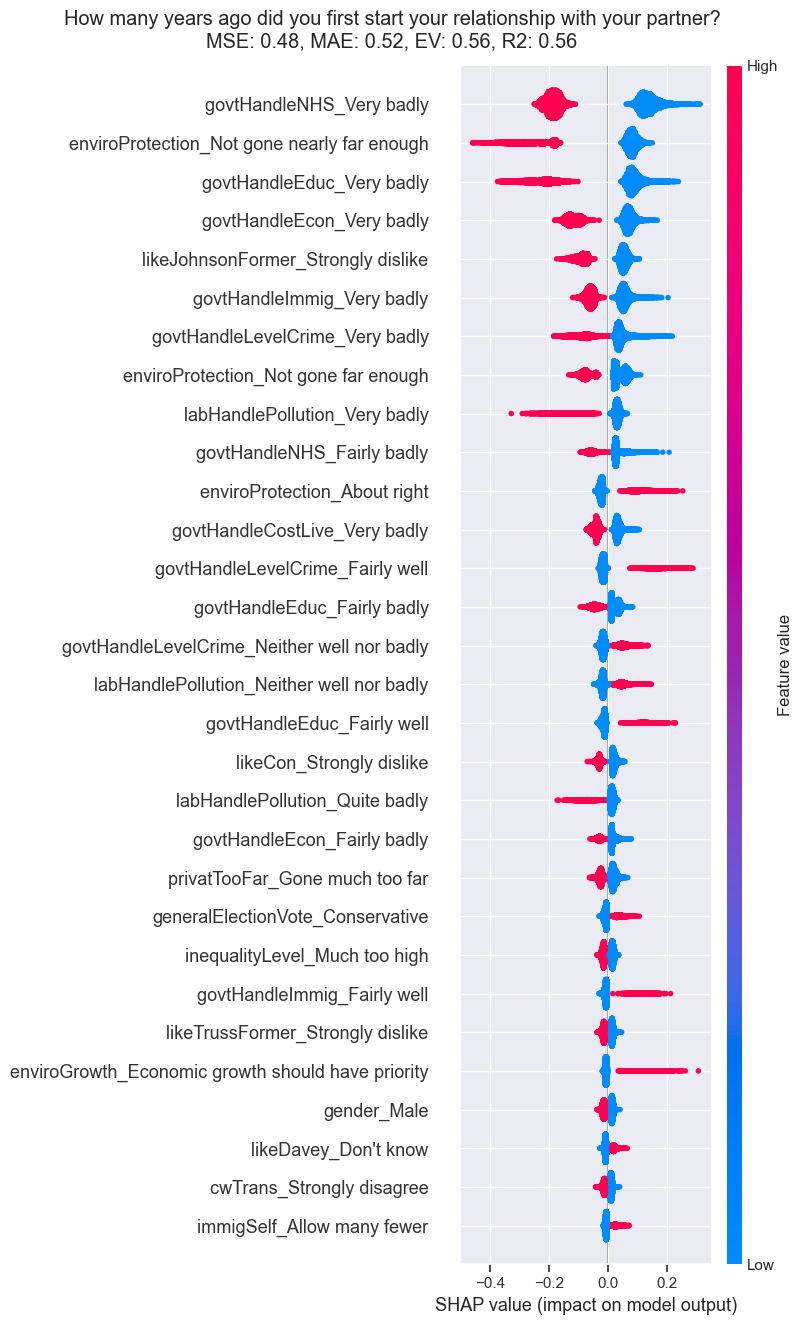

In [18]:
# govtHandlePollution
name="govtHandlePollution"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for conLookAfterPublic r p N 
 
 govtHandlePollution 
 0.490000 
 0.00 
 19243 
 
 
 partyId_Conservative 
 0.440000 
 0.00 
 20889 
 
 
 inequalityLevel 
 0.440000 
 0.00 
 19280 
 
 
 conLookAfterYoung_Fairly closely 
 0.430000 
 0.00 
 20889 
 
 
 generalElectionVote_Conservative 
 0.430000 
 0.00 
 20889 
 
 
 p_past_vote_2019_Conservative 
 0.430000 
 0.00 
 20889 
 
 
 conLookAfterWC_Fairly closely 
 0.410000 
 0.00 
 20889 
 
 
 p_past_vote_2017_Conservative 
 0.410000 
 0.00 
 20889 
 
 
 conLookAfterNoEducated_Fairly closely 
 0.390000 
 0.00 
 20889 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.370000 
 0.00 
 20889 
 
 
 conLookAfterBA_Fairly closely 
 0.360000 
 0.00 
 20889 
 
 
 euID_The leave side 
 0.350000 
 0.00 
 20889 
 
 
 ptvCon_Very likely 
 0.350000 
 0.00 
 20889 
 
 
 bestOnMII_Conservative 
 0.350000 
 0.00 
 20889 
 
 
 p_past_vote_2015_Conservative 
 0.330000 
 0.00 
 20889 
 
 
 ptvLab_Very unlikely 
 0.320000 
 0.00 
 20889 
 
 
 govtHandleEcon_Fairly well 
 0.310000 
 0.00 
 20889 
 
 
 inequalityLevel_About right 
 0.290000 
 0.00 
 20889 
 
 
 monarch_Strongly agree 
 0.290000 
 0.00 
 20889 
 
 
 cutsTooFarNational_About right 
 0.290000 
 0.00 
 20889 
 
 Top 20 negative (spearman) correlations for conLookAfterPublic r p N 
 
 conLookAfterYoung_Not at all closely 
 -0.500000 
 0.00 
 20889 
 
 
 ptvCon_Very unlikely 
 -0.490000 
 0.00 
 20889 
 
 
 govtHandleNHS_Very badly 
 -0.490000 
 0.00 
 20889 
 
 
 likeJohnsonFormer_Strongly dislike 
 -0.480000 
 0.00 
 20889 
 
 
 likeCon_Strongly dislike 
 -0.470000 
 0.00 
 20889 
 
 
 conLookAfterWC_Not at all closely 
 -0.460000 
 0.00 
 20889 
 
 
 govtHandleEcon_Very badly 
 -0.450000 
 0.00 
 20889 
 
 
 govtHandleCostLive_Very badly 
 -0.440000 
 0.00 
 20889 
 
 
 cutsTooFarNHS_Gone much too far 
 -0.430000 
 0.00 
 20889 
 
 
 cutsTooFarNational_Gone much too far 
 -0.420000 
 0.00 
 20889 
 
 
 govtHandleEduc_Very badly 
 -0.420000 
 0.00 
 20889 
 
 
 govtHandlePollution_Very badly 
 -0.420000 
 0.00 
 20889 
 
 
 conLookAfterBA_Not at all closely 
 -0.410000 
 0.00 
 20889 
 
 
 inequalityLevel_Much too high 
 -0.410000 
 0.00 
 20889 
 
 
 conLookAfterNoEducated_Not at all closely 
 -0.400000 
 0.00 
 20889 
 
 
 privatTooFar_Gone much too far 
 -0.380000 
 0.00 
 20889 
 
 
 pubPrivEfficient 
 -0.370000 
 0.00 
 18633 
 
 
 euRefVoteAfter_Rejoin the EU 
 -0.370000 
 0.00 
 20889 
 
 
 lr4_Strongly agree 
 -0.360000 
 0.00 
 20889 
 
 
 p_past_vote_2019_Labour 
 -0.360000 
 0.00 
 20889

MSE: 0.36, MAE: 0.44, EV: 0.57, R2: 0.57


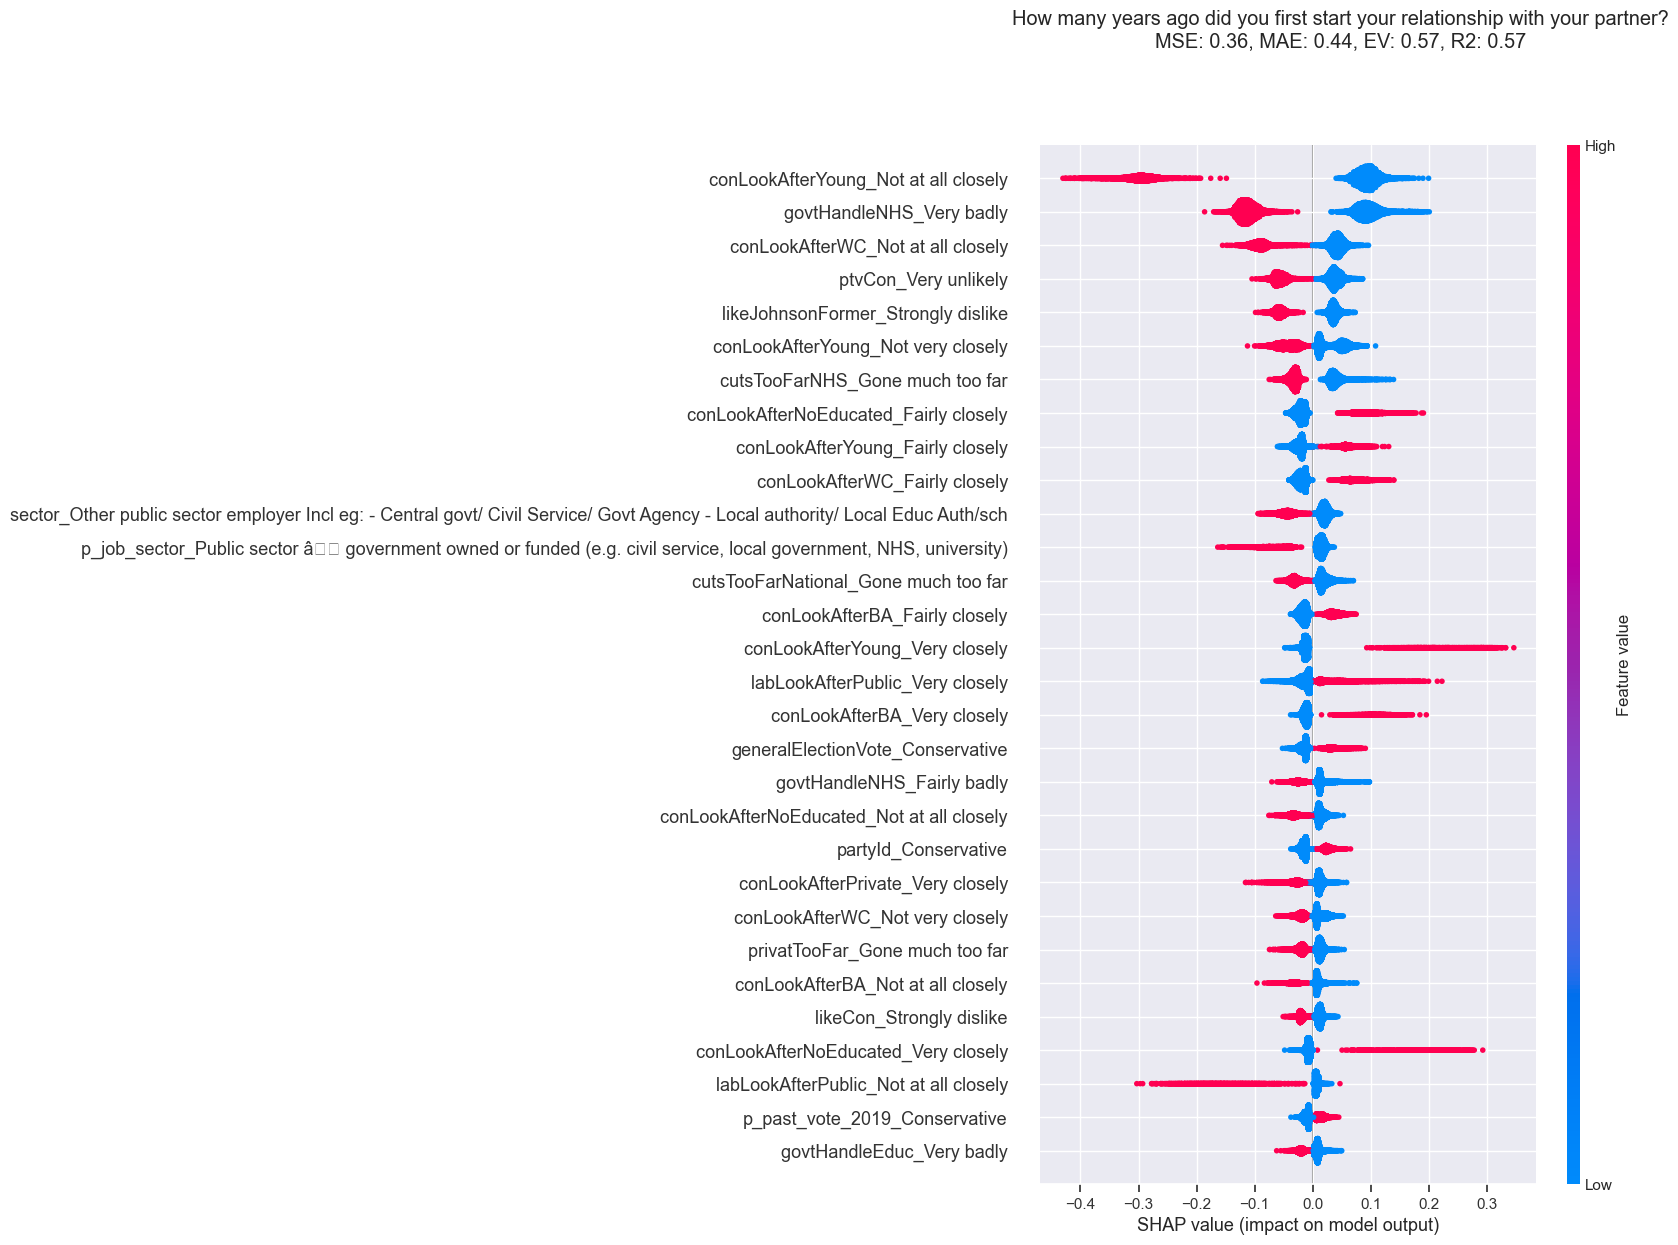

In [19]:
# conLookAfterPublic
name="conLookAfterPublic"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for conLookAfterPrivate r p N 
 
 conLookAfterMC_Very closely 
 0.250000 
 0.00 
 20107 
 
 
 conLookAfterWhite_Very closely 
 0.240000 
 0.00 
 20107 
 
 
 conLookAfterEducated_Very closely 
 0.200000 
 0.00 
 20107 
 
 
 labLookAfterWC_Very closely 
 0.160000 
 0.00 
 20107 
 
 
 labLookAfterWhite_Very closely 
 0.130000 
 0.00 
 20107 
 
 
 conLookAfterRetired_Very closely 
 0.130000 
 0.00 
 20107 
 
 
 discrimTrans 
 0.120000 
 0.00 
 18253 
 
 
 conLookAfterNoEducated_Very closely 
 0.110000 
 0.00 
 20107 
 
 
 gender_Female 
 0.110000 
 0.00 
 20107 
 
 
 labLookAfterYoung_Very closely 
 0.110000 
 0.00 
 20107 
 
 
 labLookAfterNoEducated_Very closely 
 0.110000 
 0.00 
 20107 
 
 
 generalElectionVote_Labour 
 0.110000 
 0.00 
 20107 
 
 
 labLookAfterEducated_Fairly closely 
 0.100000 
 0.00 
 20107 
 
 
 labHandleCostLive_Fairly well 
 0.100000 
 0.00 
 20107 
 
 
 labLookAfterWhite_Fairly closely 
 0.100000 
 0.00 
 20107 
 
 
 discrimGay 
 0.100000 
 0.00 
 18618 
 
 
 euID_The remain side 
 0.100000 
 0.00 
 20107 
 
 
 partyId_Labour 
 0.100000 
 0.00 
 20107 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.100000 
 0.00 
 20107 
 
 
 labHandleEduc_Fairly well 
 0.090000 
 0.00 
 20107 
 
 Top 20 negative (spearman) correlations for conLookAfterPrivate r p N 
 
 conLookAfterMC_Not very closely 
 -0.170000 
 0.00 
 20107 
 
 
 conLookAfterWhite_Not at all closely 
 -0.160000 
 0.00 
 20107 
 
 
 conLookAfterEducated_Not at all closely 
 -0.160000 
 0.00 
 20107 
 
 
 conLookAfterWhite_Not very closely 
 -0.160000 
 0.00 
 20107 
 
 
 conLookAfterMC_Not at all closely 
 -0.150000 
 0.00 
 20107 
 
 
 conLookAfterEducated_Not very closely 
 -0.140000 
 0.00 
 20107 
 
 
 labLookAfterWhite_Not at all closely 
 -0.140000 
 0.00 
 20107 
 
 
 labLookAfterMC_Not at all closely 
 -0.130000 
 0.00 
 20107 
 
 
 labLookAfterPrivate_Not at all closely 
 -0.130000 
 0.00 
 20107 
 
 
 labLookAfterWhite_Not very closely 
 -0.130000 
 0.00 
 20107 
 
 
 labLookAfterNoEducated_Not at all closely 
 -0.120000 
 0.00 
 20107 
 
 
 labLookAfterNoEducated_Not very closely 
 -0.120000 
 0.00 
 20107 
 
 
 labLookAfterWC_Not very closely 
 -0.120000 
 0.00 
 20107 
 
 
 labHandleImmig_Very badly 
 -0.120000 
 0.00 
 20107 
 
 
 labLookAfterWC_Not at all closely 
 -0.120000 
 0.00 
 20107 
 
 
 gender_Male 
 -0.110000 
 0.00 
 20107 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.110000 
 0.00 
 20107 
 
 
 labLookAfterYoung_Not at all closely 
 -0.110000 
 0.00 
 20107 
 
 
 likeGrn_Strongly dislike 
 -0.110000 
 0.00 
 20107 
 
 
 labHandleCostLive_Very badly 
 -0.110000 
 0.00 
 20107

MSE: 0.52, MAE: 0.56, EV: 0.27, R2: 0.27


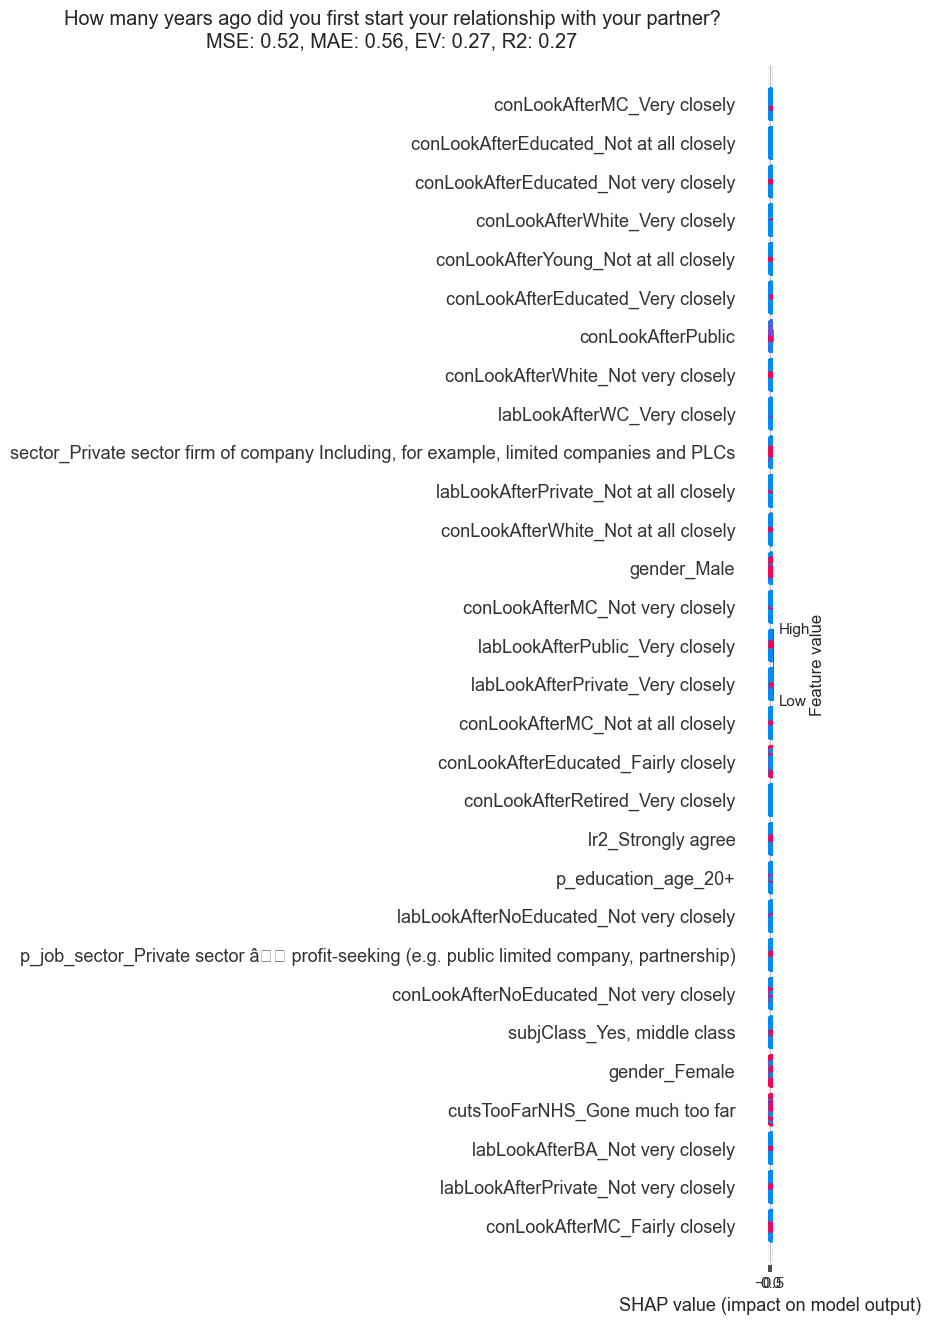

In [20]:
# conLookAfterPrivate
name="conLookAfterPrivate"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for statusAreaEdu r p N 
 
 statusAreaSpaces_Agree 
 0.270000 
 0.00 
 4923 
 
 
 changeSchools 
 0.270000 
 0.00 
 4566 
 
 
 statusAreaSpaces_Strongly agree 
 0.220000 
 0.00 
 4923 
 
 
 statusAreaShops_Strongly agree 
 0.180000 
 0.00 
 4923 
 
 
 statusAreaCrime_Disagree 
 0.180000 
 0.00 
 4923 
 
 
 statusAreaSpirit_Disagree 
 0.180000 
 0.00 
 4923 
 
 
 statusAreaShops_Agree 
 0.170000 
 0.00 
 4923 
 
 
 changeSchools_Staying about the same 
 0.160000 
 0.00 
 4923 
 
 
 statusActivities2_1_Yes 
 0.150000 
 0.00 
 4923 
 
 
 monarch_Strongly agree 
 0.140000 
 0.00 
 4923 
 
 
 efficacyPolCare_Disagree 
 0.140000 
 0.00 
 4923 
 
 
 goodConductLocals_Conducted fairly 
 0.140000 
 0.00 
 4923 
 
 
 statusAreaSpirit_Strongly disagree 
 0.130000 
 0.00 
 4923 
 
 
 p_past_vote_2015_Conservative 
 0.130000 
 0.00 
 4923 
 
 
 britishPride_Strongly agree 
 0.130000 
 0.00 
 4923 
 
 
 govtHandleEduc_Fairly well 
 0.130000 
 0.00 
 4923 
 
 
 conLookAfterPublic 
 0.130000 
 0.00 
 4239 
 
 
 govtHandlePollution 
 0.130000 
 0.00 
 4441 
 
 
 ptvCon_Very likely 
 0.130000 
 0.00 
 4923 
 
 
 statusAreaCrime_Strongly disagree 
 0.120000 
 0.00 
 4923 
 
 Top 20 negative (spearman) correlations for statusAreaEdu r p N 
 
 changeSchools_Getting a lot worse 
 -0.230000 
 0.00 
 4923 
 
 
 statusAreaSpaces_Disagree 
 -0.210000 
 0.00 
 4923 
 
 
 statusAreaSpaces_Strongly disagree 
 -0.200000 
 0.00 
 4923 
 
 
 trustMPs_No trust 
 -0.190000 
 0.00 
 4923 
 
 
 govtHandleEduc_Very badly 
 -0.180000 
 0.00 
 4923 
 
 
 likeSunak_Strongly dislike 
 -0.170000 
 0.00 
 4923 
 
 
 govtHandleLevelCrime_Very badly 
 -0.160000 
 0.00 
 4923 
 
 
 statusAreaShops_Strongly disagree 
 -0.150000 
 0.00 
 4923 
 
 
 lr4_Strongly agree 
 -0.150000 
 0.00 
 4923 
 
 
 govtHandleEcon_Very badly 
 -0.150000 
 0.00 
 4923 
 
 
 conLookAfterWC_Not at all closely 
 -0.150000 
 0.00 
 4923 
 
 
 efficacyPolCare_Strongly agree 
 -0.150000 
 0.00 
 4923 
 
 
 govtHandleCostLive_Very badly 
 -0.140000 
 0.00 
 4923 
 
 
 statusActivities2_1_No 
 -0.140000 
 0.00 
 4923 
 
 
 govtHandlePollution_Very badly 
 -0.140000 
 0.00 
 4923 
 
 
 monarch_Strongly disagree 
 -0.130000 
 0.00 
 4923 
 
 
 handleUkraine_Very badly 
 -0.130000 
 0.00 
 4923 
 
 
 conLookAfterYoung_Not at all closely 
 -0.130000 
 0.00 
 4923 
 
 
 statusAreaSpirit_Agree 
 -0.130000 
 0.00 
 4923 
 
 
 statusAreaShops_Disagree 
 -0.130000 
 0.00 
 4923

MSE: 0.69, MAE: 0.65, EV: 0.23, R2: 0.23


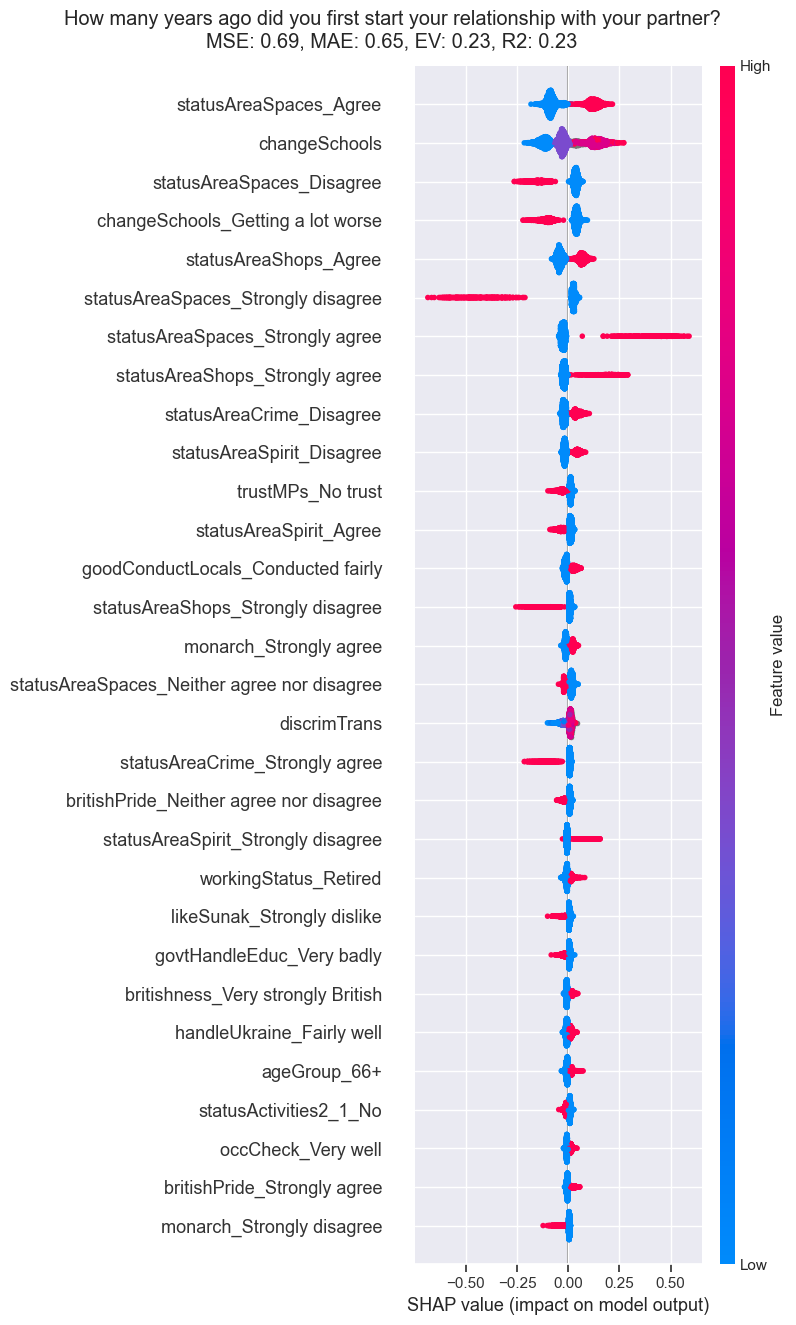

In [21]:
# statusAreaEdu
name="statusAreaEdu"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for cwTrans r p N 
 
 discrimTrans 
 0.390000 
 0.00 
 19698 
 
 
 likeCorbynFormer 
 0.340000 
 0.00 
 21880 
 
 
 discrimGay 
 0.340000 
 0.00 
 20081 
 
 
 cwParents_Strongly agree 
 0.260000 
 0.00 
 22844 
 
 
 cwParents_Agree 
 0.250000 
 0.00 
 22844 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.250000 
 0.00 
 22844 
 
 
 cwAuthors_Agree 
 0.230000 
 0.00 
 22844 
 
 
 discrimTrans_A lot of discrimination against 
 0.230000 
 0.00 
 22844 
 
 
 euID_The remain side 
 0.230000 
 0.00 
 22844 
 
 
 ageGroup_18-25 
 0.220000 
 0.00 
 22844 
 
 
 p_past_vote_2019_Labour 
 0.210000 
 0.00 
 22844 
 
 
 generalElectionVote_Labour 
 0.200000 
 0.00 
 22844 
 
 
 cwAuthors_Strongly agree 
 0.200000 
 0.00 
 22844 
 
 
 conLookAfterBA_Not at all closely 
 0.190000 
 0.00 
 22844 
 
 
 cwLanguage_Neither agree nor disagree 
 0.180000 
 0.00 
 22844 
 
 
 al1_Strongly disagree 
 0.180000 
 0.00 
 22844 
 
 
 partyId_Labour 
 0.180000 
 0.00 
 22844 
 
 
 cwStatues_Disagree 
 0.180000 
 0.00 
 22844 
 
 
 cwStatues_Neither agree nor disagree 
 0.170000 
 0.00 
 22844 
 
 
 changeImmig_Staying about the same 
 0.170000 
 0.00 
 22844 
 
 Top 20 negative (spearman) correlations for cwTrans r p N 
 
 cwStatues_Strongly agree 
 -0.370000 
 0.00 
 22844 
 
 
 cwLanguage_Strongly agree 
 -0.360000 
 0.00 
 22844 
 
 
 cwParents_Strongly disagree 
 -0.340000 
 0.00 
 22844 
 
 
 labHandleImmig_Very badly 
 -0.310000 
 0.00 
 22844 
 
 
 cwAuthors_Strongly disagree 
 -0.310000 
 0.00 
 22844 
 
 
 likeCorbynFormer_Strongly dislike 
 -0.310000 
 0.00 
 22844 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.300000 
 0.00 
 22844 
 
 
 p_past_vote_2019_Conservative 
 -0.290000 
 0.00 
 22844 
 
 
 ptvGrn_Very unlikely 
 -0.290000 
 0.00 
 22844 
 
 
 changeImmig_Getting a lot higher 
 -0.290000 
 0.00 
 22844 
 
 
 labHandleEcon_Very badly 
 -0.280000 
 0.00 
 22844 
 
 
 euID_The leave side 
 -0.280000 
 0.00 
 22844 
 
 
 p_past_vote_2017_Conservative 
 -0.270000 
 0.00 
 22844 
 
 
 ptvLab_Very unlikely 
 -0.270000 
 0.00 
 22844 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.270000 
 0.00 
 22844 
 
 
 p_eurefvote_I voted to leave 
 -0.270000 
 0.00 
 22844 
 
 
 labHandleCostLive_Very badly 
 -0.250000 
 0.00 
 22844 
 
 
 immigSelf_Allow many fewer 
 -0.250000 
 0.00 
 22844 
 
 
 ptvLD_Very unlikely 
 -0.240000 
 0.00 
 22844 
 
 
 partyId_Conservative 
 -0.240000 
 0.00 
 22844

MSE: 0.73, MAE: 0.61, EV: 0.44, R2: 0.44


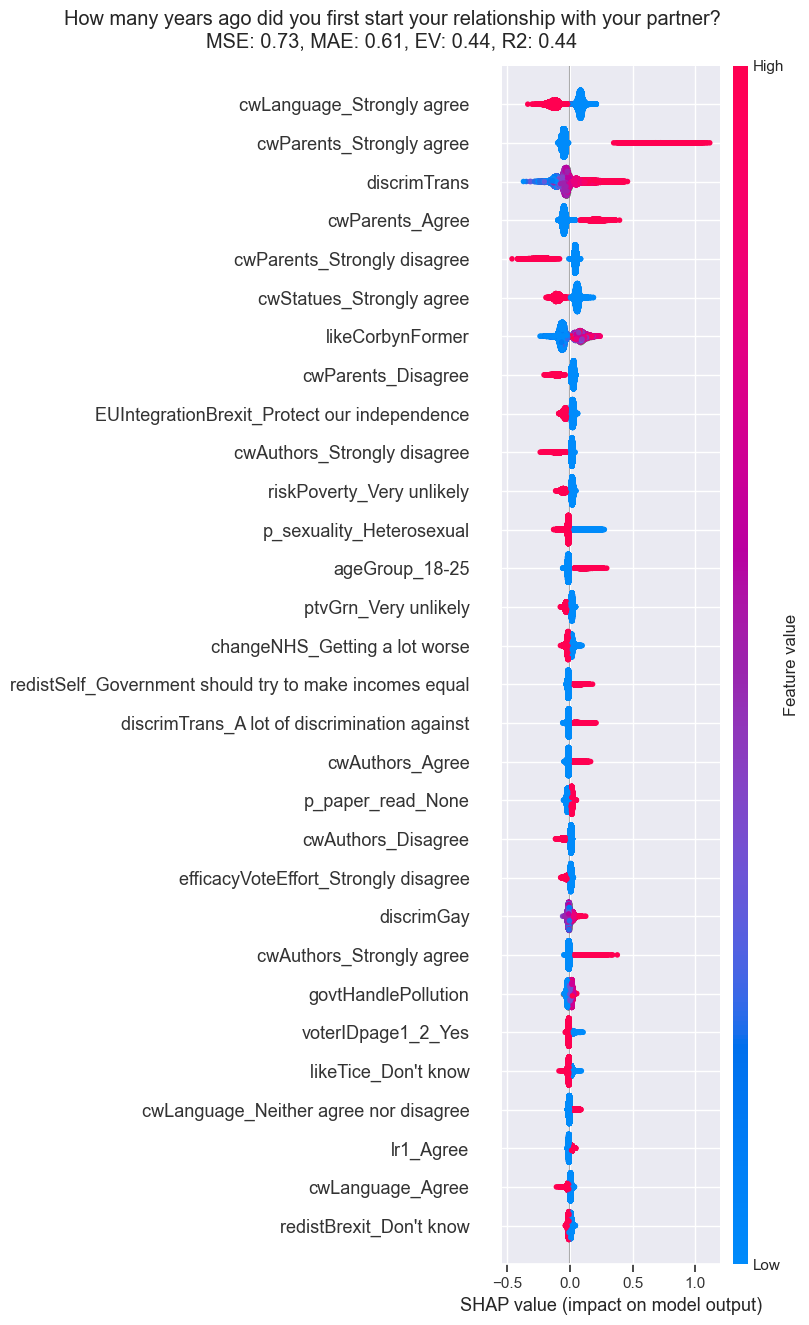

In [22]:
# cwTrans
name="cwTrans"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)